In [1]:
import pandas as pd
import numpy as np
import random

np.random.seed(1)
random.seed(1)
TRAININFO = "/data/HitSongPrediction/train_info.tsv"
TRAINRANK =  "/data/HitSongPrediction/train_rank.csv"
TESTINFO = "/data/HitSongPrediction/test_info.tsv"
SUBMISSION = "/data/HitSongPrediction/submission.csv"

df_i = pd.read_csv(TRAININFO, delimiter='\t',encoding='utf-8')
df_r = pd.read_csv(TRAINRANK)
df_i_train = df_i.merge(df_r, left_on='ID', right_on='ID')
df_i_train["dataset"] = "train"

df_i_test = pd.read_csv(TESTINFO, delimiter='\t',encoding='utf-8')
df_i_test["label"] = np.nan
df_i_test["dataset"] = "test"

df = pd.concat([df_i_train, df_i_test])
df_track_info = pd.read_csv("../csv/all_track_info.csv")
df = df.merge(df_track_info, left_on='ID', right_on='ID')
df_audio_features = pd.read_csv("../csv/all_track_audio_features.csv")
df =df.merge(df_audio_features,left_on="ID",right_on="ID", how="left")

# Sort dataset by Id
df = df.sort_values(by=['ID'])
df= df.reset_index()
# for i,o in df.iterrows():
#     print(o.ID,"------",o.album,"--------", o.genre,"------",o.artist_name,"---",o.label)
df.head(20)

,index,ID,title,artist_name,artist_id,composers_name,composers_id,release_time,label,dataset,...,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio,tonal.chords_key,tonal.chords_scale,tonal.key_edma.key,tonal.key_edma.scale,tonal.key_krumhansl.key,tonal.key_krumhansl.scale,tonal.key_temperley.key,tonal.key_temperley.scale
0,0,1073748245,Đêm Chôn Dầu Vượt Biển,Như Quỳnh,551,Châu Đình An,5765,2017-10-01 22:07:00,7.0,train,...,440.000000,0.601478,D,major,G,major,G,major,G,major
1,1,1073751978,Mùa Thu Trong Mưa,Minh Tuyết,455,Trường Sa,100105,2017-10-01 20:58:00,3.0,train,...,434.193115,0.944516,C,minor,C,minor,C,minor,C,minor
2,2,1073835561,Rồi Ánh Trăng Tan,Lưu Bích,450,Quốc Bảo,4355,2017-11-01 18:16:00,6.0,train,...,434.193115,0.957651,Bb,major,D,minor,D,minor,D,minor
3,3,1073856553,Còn Thương Rau Đắng Mọc Sau Hè,Như Quỳnh,551,Bắc Sơn,7686,2017-11-01 17:36:00,2.0,train,...,441.272583,0.796499,G,minor,G,minor,G,minor,G,minor
4,4,1073929630,Người Điên Biết Yêu,Như Loan,513,Lê Minh Kha,100466,2017-11-01 17:49:00,7.0,train,...,434.946167,0.860068,A,minor,D,minor,D,minor,D,minor
5,5,1073929880,Đàn Bà,Don Hồ,6515,Song Ngọc,100288,2017-10-01 21:33:00,3.0,train,...,436.960693,0.768609,A,minor,D,minor,A,minor,A,minor
6,6,1073949310,Yêu Một Người Sống Bên Một Người,Minh Tuyết,455,Hoài An,100133,2017-11-01 18:27:00,4.0,train,...,442.548920,0.701749,D,minor,A,minor,A,minor,A,minor
7,9078,1073994292,Giấc Mơ Mình Em,Minh Tuyết,455,Minh Vy,100019,2017-11-01 18:27:00,NaN,test,...,441.782684,0.659616,Bb,major,Bb,major,Bb,major,Bb,major
8,7,1073994297,Mất Nhau Trong Đời,Minh Tuyết,455,Huỳnh Nhật Tân,100306,2017-11-01 18:27:00,8.0,train,...,434.193115,0.913990,C,minor,C,minor,C,minor,C,minor
9,8,1073994298,Những Ân Tình Xưa,"Minh Tuyết, Bằng Kiều",455.306,Hoài An,100133,2017-11-01 18:27:00,4.0,train,...,437.971466,0.726335,A,minor,A,minor,A,minor,A,minor


In [2]:
from PIL import Image
import imagehash
import os
images_train_path = "/data/zalo/hit-song-prediction/train-image-samples"
images_test_path = "/data/zalo/hit-song-prediction/test-image-samples"

df["album_hash"] = df["album"] 
for i, row in df.iterrows():
    if row["dataset"]== "train":
        images_path = images_train_path
    else:
        images_path = images_test_path
    
    jpg_path = "/".join([images_path, str(row["ID"])+".mp3.jpg"])
    if os.path.isfile(jpg_path):
        df["album_hash"].iloc[i] = str(imagehash.average_hash(Image.open(jpg_path)))
        print(i)
    else:
        df["album_hash"].iloc[i] = np.nan

/home/vuthede/.local/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
153
154
155
156
157
158
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
28

1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196


3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881


5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595
5596
5597
5598
5599
5600
5601
5602
5603
5604
5605
5606
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623
5624
5625
5626
5627
5628
5629
5630
5631
5632
5633
5634
5635
5636
5637
5638
5639
5640
5641
5642
5643
5644
5645
5646
5647
5648
5649
5650
5651
5652
5653
5654
5655
5656
5657
5658
5659
5660
5661
5662
5663
5664
5665
5666
5667
5668
5669
5670
5671
5672
5673
5674
5675
5676
5677
5678
5679
5680
5681
5682
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692
5693
5694
5696
5697
5698
5699
5700
5701
5702
5703
5704
5705
5706
5707
5708
5709
5710
5711
5712
5713
5714
5715
5716
5717
5718
5719
5720
5721
5722
5723
5724
5725
5726
5727
5728
5729
5730
5731
5732
5733
5734
5735
5736
5737
5738


7281
7282
7283
7284
7285
7286
7287
7288
7289
7290
7291
7292
7293
7294
7295
7296
7297
7298
7299
7300
7301
7302
7303
7304
7305
7306
7307
7308
7309
7310
7311
7312
7313
7314
7315
7316
7317
7318
7319
7320
7321
7322
7323
7324
7325
7326
7327
7328
7329
7330
7331
7332
7333
7334
7335
7336
7337
7338
7339
7340
7341
7342
7343
7344
7345
7346
7347
7348
7349
7350
7351
7352
7353
7354
7355
7356
7357
7358
7359
7360
7361
7362
7363
7364
7365
7366
7367
7368
7369
7370
7371
7372
7373
7374
7375
7376
7377
7378
7379
7380
7381
7382
7383
7384
7385
7386
7387
7388
7389
7390
7391
7392
7393
7394
7395
7396
7397
7398
7399
7400
7401
7402
7403
7404
7405
7406
7407
7408
7409
7410
7411
7412
7413
7414
7415
7416
7417
7418
7419
7420
7421
7422
7423
7424
7425
7426
7427
7428
7429
7430
7431
7432
7433
7434
7435
7436
7437
7438
7439
7440
7441
7442
7443
7444
7445
7446
7447
7448
7449
7450
7451
7452
7453
7454
7455
7456
7457
7458
7459
7460
7461
7462
7463
7464
7465
7466
7467
7468
7469
7470
7471
7472
7473
7474
7475
7476
7477
7478
7479
7480


9043
9044
9045
9046
9047
9048
9049
9050
9051
9052
9053
9054
9055
9056
9057
9058
9059
9060
9061
9062
9063
9064
9065
9066
9067
9068
9069
9070
9071
9072
9073
9074
9075
9076
9077
9078
9079
9080
9081
9082
9083
9084
9085
9086
9087
9088
9089
9090
9091
9092
9093
9094
9095
9096
9097
9098
9099
9100
9101
9102
9103
9104
9105
9106
9107
9108
9109
9110
9111
9112
9113
9114
9115
9116
9117
9118
9119
9120
9121
9122
9123
9124
9125
9126
9127
9128
9129
9130
9131
9132
9133
9134
9135
9136
9137
9138
9139
9140
9141
9142
9143
9144
9145
9146
9147
9148
9149
9150
9151
9152
9153
9154
9155
9156
9157
9158
9159
9160
9161
9162
9163
9164
9165
9166
9167
9168
9169
9170
9171
9172
9173
9174
9175
9176
9177
9178
9179
9180
9181
9182
9183
9184
9185
9186
9187
9188
9189
9190
9191
9192
9193
9194
9195
9196
9197
9198
9199
9200
9201
9202
9203
9204
9205
9206
9207
9208
9209
9210
9211
9212
9213
9214
9215
9216
9217
9218
9219
9220
9221
9222
9223
9224
9225
9226
9227
9228
9229
9230
9231
9232
9233
9234
9235
9236
9237
9238
9239
9240
9241
9242


In [3]:
for i,o in df.iterrows():
    print(o.ID,"------",o.album,"--------", str(o.album_hash),"------",o.artist_name,"---",o.track,"---",o.label)

1073748245 ------ 30 Năm Viễn Xứ -------- 3c5c7e72f9112800 ------ Như Quỳnh --- (2, 14) --- 7.0
1073751978 ------ Xin Còn Gọi Tên Nhau-Tình khúc Trường Sa -------- f39df9c10843e3fc ------ Minh Tuyết --- (4, 18) --- 3.0
1073835561 ------ Tình Mộng (Top Hits 29) -------- 073e387070f0f0f0 ------ Lưu Bích --- (6, 14) --- 6.0
1073856553 ------ Nối Lại Tình Xưa -------- cdc0a7fb7b707060 ------ Như Quỳnh --- (9, 12) --- 2.0
1073929630 ------ Tình Lặng Câm -------- 838f8f878de574f6 ------ Như Loan --- (1, 12) --- 7.0
1073929880 ------ Hà Nội Ngày Tháng Cũ (Tình khúc Song Ngọc) -------- 81202020fafafe7b ------ Don Hồ --- (12, 13) --- 3.0
1073949310 ------ Yêu Một Người Sống Bên Một Người -------- 2060802070ceffff ------ Minh Tuyết --- (1, 14) --- 4.0
1073994292 ------ Yêu Một Người Sống Bên Một Người -------- 2060802070ceffff ------ Minh Tuyết --- (6, 14) --- nan
1073994297 ------ Yêu Một Người Sống Bên Một Người -------- 2060802070ceffff ------ Minh Tuyết --- (7, 14) --- 8.0
1073994298 ------ 

1075811325 ------ Nối Lại Tình Xưa -------- cdc0a7fb7b707060 ------ Phương Hồng Quế, Thái Châu --- (11, 12) --- 2.0
1075811332 ------ Tình Lặng Câm -------- 838f8f878de574f6 ------ Như Loan --- (4, 12) --- 7.0
1075811333 ------ Tình Lặng Câm -------- 838f8f878de574f6 ------ Như Loan --- (5, 12) --- 9.0
1075811335 ------ Tình Lặng Câm -------- 838f8f878de574f6 ------ Như Loan --- (7, 12) --- 8.0
1075811336 ------ Tình Lặng Câm -------- 838f8f878de574f6 ------ Như Loan --- (8, 12) --- 7.0
1075811338 ------ Tình Lặng Câm -------- 838f8f878de574f6 ------ Như Loan --- (10, 12) --- 8.0
1075811339 ------ Tình Lặng Câm -------- 838f8f878de574f6 ------ Như Loan --- (11, 12) --- 8.0
1075811340 ------ Tình Lặng Câm -------- 838f8f878de574f6 ------ Như Loan --- (12, 12) --- 9.0
1075811341 ------ Đêm Màu Hồng -------- 81838f9fede0e1ff ------ Lương Tùng Quang --- (1, 9) --- 8.0
1075811342 ------ Đêm Màu Hồng -------- 81838f9fede0e1ff ------ Lương Tùng Quang --- (2, 9) --- 7.0
1075811343 ------ Đêm M

1075874381 ------ Đường Tình Đôi Ngã -------- f9f9f93f3f3f7f7f ------ Việt Hòa, Mai Trần Lâm --- (3, 9) --- 3.0
1075874382 ------ Đường Tình Đôi Ngã -------- f9f9f93f3f3f7f7f ------ Việt Hòa --- (4, 9) --- 5.0
1075874383 ------ Đường Tình Đôi Ngã -------- f9f9f93f3f3f7f7f ------ Việt Hòa, Mai Trần Lâm --- (5, 9) --- 4.0
1075874384 ------ Đường Tình Đôi Ngã -------- 8787c7c7fffffffd ------ Mai Trần Lâm --- (6, 9) --- 3.0
1075874385 ------ Đường Tình Đôi Ngã -------- f9f9f93f3f3f7f7f ------ Việt Hòa --- (7, 9) --- 5.0
1075874644 ------ nan -------- e341010060e6ffff ------ Phạm Anh Khoa --- (None, None) --- 4.0
1075874764 ------ nan -------- f7f7f3e1e1e0e0c0 ------ ERIK, Nguyễn Trần Trung Quân --- (None, None) --- nan
1075875342 ------ Đừng Để Anh Thất Vọng -------- cfc7efc7838383c3 ------ Tấn Văn MDP, K Sor Ka --- (1, 2) --- 9.0
1075875343 ------ Đừng Để Anh Thất Vọng -------- cfc7efc7838383c3 ------ Tấn Văn MDP, K Sor Ka --- (2, 2) --- 5.0
1075875371 ------ nan -------- f7e3efe7cf0b0000

1076279638 ------ Giọt Nắng Bên Thềm -------- nan ------ Mạnh Đồng, Phan Ý Linh --- (1, 5) --- 4.0
1076279639 ------ Giọt Nắng Bên Thềm -------- nan ------ Mạnh Đồng --- (2, 5) --- 5.0
1076279640 ------ Giọt Nắng Bên Thềm -------- nan ------ Mạnh Đồng --- (3, 5) --- 4.0
1076279641 ------ Giọt Nắng Bên Thềm -------- nan ------ Mạnh Đồng --- (4, 5) --- 4.0
1076279654 ------ Giọt Nắng Bên Thềm -------- nan ------ Mạnh Đồng --- (6, 6) --- 5.0
1076279901 ------ Tình Em Tháp Mười -------- 1f0f0f0f8f0f0703 ------ Ngọc Thảo, Hoàng Nhật Thái --- (3, 9) --- 4.0
1076279907 ------ Tình Em Tháp Mười -------- 1f0f0f0f8f0f0703 ------ Ngọc Thảo, Triệu Quang Hà --- (9, 9) --- 4.0
1076280108 ------ Con Đò Buồn -------- c7c7e7e3f3f3d3c3 ------ Phi Bằng --- (1, 12) --- 8.0
1076280109 ------ Con Đò Buồn -------- c7c7e7e3f3f3d3c3 ------ Phi Bằng, Lý Diệu Linh --- (2, 12) --- 3.0
1076280110 ------ Con Đò Buồn -------- c7c7e7e3f3f3d3c3 ------ Phi Bằng, Giáng Tiên --- (3, 12) --- 2.0
1076280111 ------ Con Đò B

1076343208 ------ nan -------- ffffffffa5000000 ------ SeVoice Band --- (None, None) --- 6.0
1076343209 ------ nan -------- ffffffffa5000000 ------ SeVoice Band --- (None, None) --- 3.0
1076343283 ------ Biển Đợi -------- 0266f6fcf0f8e040 ------ Gia Lâm --- (16, 16) --- 9.0
1076343446 ------ Người Tình Không Đến -------- 47830d05173f6f2d ------ Lâm Gia Linh --- (12, 12) --- 9.0
1076343450 ------ nan -------- 83829b9b8b9dbf97 ------ Khổng Tú Quỳnh --- (None, None) --- 1.0
1076343451 ------ nan -------- 83829b9b8b9dbf97 ------ Khổng Tú Quỳnh --- (None, None) --- 3.0
1076343456 ------ nan -------- 6470381c7c68444c ------ Bạch Công Khanh --- (None, None) --- 2.0
1076344012 ------ Cô Ấy (Single) -------- e7e791c0e3f1c1c1 ------ Khắc Minh --- (2, 2) --- 9.0
1076344024 ------ nan -------- e7e7e7efcfff1f00 ------ Thái Trâm, Trương Huy --- (None, None) --- 6.0
1076344025 ------ nan -------- e7e7e7efcfff1f00 ------ Thái Trâm --- (None, None) --- 5.0
1076344027 ------ nan -------- e7e7e7efcfff1f0

1076355589 ------ Ngày Còn Em Bên Tôi (Single) -------- 8f80d7f9f9f9ff87 ------ Thành Nguyên --- (6, 6) --- 7.0
1076355609 ------ Người Đã Từng Thương (Single) -------- ff8787c3d3e3e1ff ------ Thái Lan Viên --- (3, 3) --- 3.0
1076355610 ------ Người Đã Từng Thương (Single) -------- ff8787c3d3e3e1ff ------ Thái Lan Viên --- (2, 3) --- nan
1076355611 ------ Người Đã Từng Thương (Single) -------- ff8787c3d3e3e1ff ------ Thái Lan Viên --- (1, 3) --- 2.0
1076355723 ------ Đêm Nhớ Người Tình -------- 1818982efe5f1e0c ------ Vi Châu --- (1, 7) --- 5.0
1076355724 ------ Đêm Nhớ Người Tình -------- 1818982efe5f1e0c ------ Vi Châu, Duy Sang --- (3, 7) --- 4.0
1076355725 ------ Đêm Nhớ Người Tình -------- 1818982efe5f1e0c ------ Vi Châu --- (1, 7) --- 4.0
1076355726 ------ Đêm Nhớ Người Tình -------- 1818982efe5f1e0c ------ Vi Châu --- (5, 7) --- 4.0
1076355727 ------ Đêm Nhớ Người Tình -------- 1818982efe5f1e0c ------ Vi Châu --- (7, 7) --- 3.0
1076355728 ------ Đêm Nhớ Người Tình -------- 18189

1076375419 ------ Yêu 5 (Masew Mix) -------- c7c3c3e7f7f3e7ef ------ Rhymastic, Masew --- (1, 1) --- nan
1076375887 ------ Bạn (Single) -------- ffffff8181ffffff ------ RHY --- (1, 1) --- 1.0
1076375904 ------ Cùng Đi Chơi Trăng (Single) -------- 0f0f193dbcf89090 ------ SGirls --- (1, 1) --- 2.0
1076376238 ------ nan -------- e7ffff0202c30180 ------ Giang Anh Kỳ --- (None, None) --- 2.0
1076376239 ------ nan -------- e7ffff0202c30180 ------ Giang Anh Kỳ --- (None, None) --- nan
1076376240 ------ nan -------- e7ffff0202c30180 ------ Giang Anh Kỳ --- (None, None) --- 3.0
1076376241 ------ nan -------- e7ffff0202c30180 ------ Giang Anh Kỳ --- (None, None) --- 3.0
1076376650 ------ nan -------- nan ------ Hồng Gấm --- (None, None) --- 10.0
1076376651 ------ nan -------- nan ------ Hồng Gấm --- (None, None) --- 6.0
1076376653 ------ nan -------- nan ------ Hồng Gấm --- (None, None) --- 5.0
1076376654 ------ nan -------- nan ------ Hồng Gấm --- (None, None) --- 7.0
1076376655 ------ nan ----

1076390156 ------ Có Em Trong Kỷ Niệm -------- cfc7cff998882d07 ------ Lê Vương --- (1, 1) --- 4.0
1076390393 ------ nan -------- c080f8fcfcb80000 ------ Đỗ Phú Quí --- (None, None) --- 1.0
1076390561 ------ Ai Ngờ Ta Còn Thương (Single) -------- f9c181c1e3e19fff ------ Karik, Thái Trinh --- (1, 1) --- 1.0
1076390974 ------ Mười Ngón Tay Tình Yêu -------- 1f5f0f0f8f8f8f8f ------ Hồng Phượng, Ngọc Hân --- (9, 10) --- 3.0
1076390975 ------ Mười Ngón Tay Tình Yêu -------- 1f5f0f0f8f8f8f8f ------ Hồng Phượng --- (8, 10) --- nan
1076390976 ------ Mười Ngón Tay Tình Yêu -------- 1f5f0f0f8f8f8f8f ------ Hồng Phượng, Khưu Huy Vũ --- (7, 10) --- 3.0
1076390978 ------ Mười Ngón Tay Tình Yêu -------- 1f5f0f0f8f8f8f8f ------ Hồng Phượng --- (5, 10) --- 3.0
1076390979 ------ Mười Ngón Tay Tình Yêu -------- 1f5f0f0f8f8f8f8f ------ Hồng Phượng, Huỳnh Thật --- (4, 10) --- 3.0
1076390980 ------ Mười Ngón Tay Tình Yêu -------- 1f5f0f0f8f8f8f8f ------ Hồng Phượng --- (3, 10) --- 4.0
1076390981 ------ Mườ

1076405180 ------ Kể Câu Chuyện Tình -------- 0400ccec0c0e3f0f ------ Nguyễn Ngọc Sơn --- (6, 7) --- 7.0
1076405181 ------ Kể Câu Chuyện Tình -------- 0400ccec0c0e3f0f ------ Nguyễn Ngọc Sơn --- (5, 7) --- 6.0
1076405182 ------ Kể Câu Chuyện Tình -------- 0400ccec0c0e3f0f ------ Nguyễn Ngọc Sơn --- (4, 7) --- 7.0
1076405184 ------ Kể Câu Chuyện Tình -------- 0400ccec0c0e3f0f ------ Nguyễn Ngọc Sơn --- (2, 7) --- 6.0
1076405185 ------ Kể Câu Chuyện Tình -------- 0400ccec0c0e3f0f ------ Nguyễn Ngọc Sơn --- (1, 7) --- 6.0
1076405190 ------ Cố Chấp (Single) -------- ffff272f07370000 ------ KNK Tô Huy, Huniixo --- (1, 1) --- 2.0
1076405382 ------ Khát Vọng Tuổi Trẻ, Thành Phố Anh Hùng -------- f0bfbffffe000125 ------ Hứa Kim Tuyền --- (1, 11) --- 7.0
1076405429 ------ Em Dạo Này (Single) -------- 00f8fffffffff300 ------ Ngọt --- (1, 1) --- nan
1076405440 ------ Chạm Khẽ Tim Anh Một Chút Thôi (Single) -------- c7c7fbfbdb8b8381 ------ Noo Phước Thịnh --- (2, 2) --- 1.0
1076405441 ------ Chạm 

1076418081 ------ nan -------- eff7ff734100e008 ------ Dương Nguyên Tâm --- (None, None) --- 2.0
1076418117 ------ Sương Lạnh Chiều Đông (Vol 1) -------- 00000010fcffff7f ------ Tuấn Tú --- (14, 15) --- 9.0
1076418120 ------ Sương Lạnh Chiều Đông (Vol 1) -------- 00000010fcffff7f ------ Tuấn Tú --- (11, 15) --- 7.0
1076418121 ------ Sương Lạnh Chiều Đông (Vol 1) -------- 00000010fcffff7f ------ Tuấn Tú --- (10, 15) --- 7.0
1076418123 ------ Sương Lạnh Chiều Đông (Vol 1) -------- 00000010fcffff7f ------ Tuấn Tú --- (8, 15) --- 9.0
1076418124 ------ Sương Lạnh Chiều Đông (Vol 1) -------- 00000010fcffff7f ------ Tuấn Tú --- (7, 15) --- 8.0
1076418125 ------ Sương Lạnh Chiều Đông (Vol 1) -------- 00000010fcffff7f ------ Tuấn Tú --- (6, 15) --- 8.0
1076418126 ------ Sương Lạnh Chiều Đông (Vol 1) -------- 00000010fcffff7f ------ Tuấn Tú --- (5, 15) --- 9.0
1076418127 ------ Sương Lạnh Chiều Đông (Vol 1) -------- 00000010fcffff7f ------ Tuấn Tú --- (4, 15) --- nan
1076418128 ------ Sương Lạnh

1076434031 ------ Đã Lỡ Yêu Em Nhiều (Single) -------- 60fefaf05001f9e3 ------ JustaTee --- (1, 1) --- 1.0
1076434081 ------ Tuyển Tập Bolero Vol 1 -------- cf87a39f1f0f0f0f ------ Chu Hoàng Tuấn --- (7, 9) --- 7.0
1076434082 ------ Tuyển Tập Bolero Vol 1 -------- cf87a39f1f0f0f0f ------ Chu Hoàng Tuấn --- (6, 9) --- 8.0
1076434083 ------ Tuyển Tập Bolero Vol 1 -------- cf87a39f1f0f0f0f ------ Chu Hoàng Tuấn --- (5, 9) --- 6.0
1076434084 ------ Tuyển Tập Bolero Vol 1 -------- cf87a39f1f0f0f0f ------ Chu Hoàng Tuấn --- (4, 9) --- 8.0
1076434085 ------ Tuyển Tập Bolero Vol 1 -------- cf87a39f1f0f0f0f ------ Chu Hoàng Tuấn --- (3, 9) --- nan
1076434086 ------ Tuyển Tập Bolero Vol 1 -------- cf87a39f1f0f0f0f ------ Chu Hoàng Tuấn --- (2, 9) --- 6.0
1076434397 ------ Tình Như Mây Khói -------- 8068fcfccc880808 ------ Lý Công --- (5, 7) --- 8.0
1076434398 ------ Tình Như Mây Khói -------- 8068fcfccc880808 ------ Lý Công --- (4, 7) --- 6.0
1076434399 ------ Tình Như Mây Khói -------- 8068fcfc

1076442519 ------ Vài Tháng Sau (Single) -------- ffff5f188080f8f9 ------ JayKii --- (1, 2) --- nan
1076443216 ------ Nếu Yêu Em Là Sai (Single) -------- f7f7e7c7c7c7c3c3 ------ Lê Hiếu --- (1, 1) --- 1.0
1076443336 ------ Lâu Đài Cát (Single) -------- fffff7e740002000 ------ Văn Mai Hương --- (1, 1) --- 1.0
1076443416 ------ nan -------- eec7deefe1e0c0c0 ------ Linh Mục Nguyễn Tuấn Dương, Gia Ân --- (None, None) --- 4.0
1076443417 ------ nan -------- eec7deefe1e0c0c0 ------ Linh Mục Nguyễn Tuấn Dương, Gia Ân --- (None, None) --- 6.0
1076443438 ------ nan -------- 05038397cfcf4f4f ------ Đặng Gia Phúc --- (None, None) --- 8.0
1076443486 ------ Hãy Để Em Là Của Anh (Single) -------- f381f0fafbf79121 ------ Khang Việt --- (2, 2) --- 2.0
1076443487 ------ Hãy Để Em Là Của Anh (Single) -------- f381f0fafbf79121 ------ Khang Việt --- (1, 2) --- 6.0
1076443529 ------ Tình Đẹp Làng Quê (Single) -------- 006466267ff9fcf0 ------ Đồng Thanh Tâm, Diễm Hân --- (1, 1) --- 3.0
1076443544 ------ Cô B

1076458469 ------ Giá Như Có Em (Single) -------- f7f3e7c79f9a0200 ------ Nhất Thiên --- (1, 2) --- 8.0
1076458471 ------ Trường Tôi (Phan Bội Châu QB) (Single) -------- 00020060f0ffe78f ------ Mr Hero --- (1, 2) --- 9.0
1076458478 ------ nan -------- 6e000267e7e7e7ef ------ Bảo Nguyên --- (None, None) --- 9.0
1076458479 ------ nan -------- 6e000267e7e7e7ef ------ Bảo Nguyên --- (None, None) --- 8.0
1076458480 ------ nan -------- 6e000267e7e7e7ef ------ Bảo Nguyên --- (None, None) --- 10.0
1076458482 ------ Chuyện Tình Phố Đêm (Single) -------- efadb9af2620287c ------ Bảo Thắng --- (1, 1) --- 7.0
1076458485 ------ Yêu Thương Vô Tình (Single) -------- f0f0f283ffff0303 ------ Gia Huy --- (1, 2) --- 6.0
1076458624 ------ Bứt Phá Vươn Xa (Single) -------- 0000067c6cf4fbfb ------ Sỹ Luân --- (1, 1) --- 6.0
1076458625 ------ nan -------- nan ------ Vy Vy --- (None, None) --- 8.0
1076458628 ------ Yêu Nhau Đi Em Ơi! (Single) -------- f8f0c1838181dfbf ------ Châu Khải Phong, Trương Cát Ân --- 

1078004042 ------ Bên Nhau Bao Lâu (Single) -------- f3f3c3131120c0e0 ------ Nguyễn Ngọc Anh, Tô Minh Đức --- (2, 3) --- 2.0
1078004043 ------ Bên Nhau Bao Lâu (Single) -------- f3f3c3131120c0e0 ------ Tô Minh Đức --- (3, 3) --- 3.0
1078004601 ------ Talk To Me (Có Nên Dừng Lại?) (Single) -------- 38707e7a3e3e1000 ------ Chi Pu --- (1, 1) --- 1.0
1078004708 ------ Album Sing My Song season 1 - Team Nguyễn Hải Phong -------- 483c19ef60662e07 ------ Bùi Công Nam --- (1, 9) --- 2.0
1078004709 ------ Album Sing My Song season 1 - Team Nguyễn Hải Phong -------- 483c19ef60662e07 ------ Vicky Nhung --- (2, 9) --- 1.0
1078004710 ------ Album Sing My Song season 1 - Team Nguyễn Hải Phong -------- 483c19ef60662e07 ------ Bùi Công Nam --- (3, 9) --- 1.0
1078004711 ------ Album Sing My Song season 1 - Team Nguyễn Hải Phong -------- 483c19ef60662e07 ------ Ưng Đại Vệ --- (4, 9) --- 1.0
1078004712 ------ Album Sing My Song season 1 - Team Nguyễn Hải Phong -------- 483c19ef60662e07 ------ Phan Mạnh Q

1078013037 ------ Chuyến Đi Của Năm (Mashup) (Single) -------- 003c7c7c4c807c40 ------ Andiez, Seachains --- (1, 1) --- 2.0
1078013038 ------ Sai Người Sai Thời Điểm (Single) -------- f3f3ff81c080c0e1 ------ Thanh Hưng --- (1, 2) --- 1.0
1078013039 ------ Sai Người Sai Thời Điểm (Single) -------- f3f3ff81c080c0e1 ------ Thanh Hưng --- (2, 2) --- 4.0
1078013198 ------ nan -------- 10101038381c3e7f ------ Hoàng Hoa --- (None, None) --- 9.0
1078013199 ------ Người Tình Mùa Đông (Single) -------- 8787878787fff8ff ------ Đỗ Lê Hồng Nhung --- (1, 1) --- 2.0
1078013201 ------ Xuân Bên Anh (Single) -------- 9f9f5b030f4fefff ------ Châu Khải Phong --- (2, 2) --- 2.0
1078013630 ------ Hết Yêu (Single) -------- efcfdf9b81892d3d ------ Thu Thủy --- (1, 1) --- 1.0
1078013636 ------ nan -------- 103c3e3030102000 ------ KNK Tô Huy --- (None, None) --- 8.0
1078013637 ------ Bình Yên Nơi Anh (Single) -------- 0040dbf87b7f1003 ------ TeamV, Nhật Nguyễn --- (1, 1) --- 1.0
1078013659 ------ Xuân Về Nhớ Tế

1078018101 ------ Tết Lì Xì -------- f93531f0e0e1f3f1 ------ Dương Hồng Loan, Lưu Chí Vỹ --- (4, 12) --- 10.0
1078018102 ------ Tết Lì Xì -------- f93531f0e0e1f3f1 ------ Dương Hồng Loan, Lê Sang --- (5, 12) --- 2.0
1078018103 ------ Tết Lì Xì -------- f93531f0e0e1f3f1 ------ Dương Hồng Loan --- (6, 12) --- nan
1078018104 ------ Tết Lì Xì -------- f93531f0e0e1f3f1 ------ Dương Hồng Loan --- (7, 12) --- 3.0
1078018105 ------ Tết Lì Xì -------- f93531f0e0e1f3f1 ------ Dương Hồng Loan --- (8, 12) --- 3.0
1078018106 ------ Tết Lì Xì -------- f93531f0e0e1f3f1 ------ Dương Hồng Loan --- (9, 12) --- 2.0
1078018107 ------ Tết Lì Xì -------- f93531f0e0e1f3f1 ------ Dương Hồng Loan, Trần Xuân Lạc --- (10, 12) --- 2.0
1078018108 ------ Tết Lì Xì -------- f93531f0e0e1f3f1 ------ Dương Hồng Loan --- (11, 12) --- 2.0
1078018109 ------ Tết Lì Xì -------- f93531f0e0e1f3f1 ------ Dương Hồng Loan --- (12, 12) --- 2.0
1078018111 ------ Người Lạ Ơi (Single) -------- f9a1a1d1818181ff ------ Karik, Orange, 

1078025578 ------ nan -------- e7c3d3d3d3e3e1f1 ------ Bùi Tuyết Mai --- (None, None) --- 10.0
1078025910 ------ nan -------- 02073f1d1c48f060 ------ Đức Phúc, Hòa Minzy --- (None, None) --- 1.0
1078025987 ------ Thói Quen Của Tình Yêu -------- fdf81f1f260c0a00 ------ Dương Vỹ Phúc --- (1, 12) --- 5.0
1078025990 ------ Thói Quen Của Tình Yêu -------- fdf81f1f260c0a00 ------ Dương Vỹ Phúc --- (4, 12) --- 8.0
1078025991 ------ Thói Quen Của Tình Yêu -------- fdf81f1f260c0a00 ------ Dương Vỹ Phúc --- (5, 12) --- 6.0
1078025992 ------ Thói Quen Của Tình Yêu -------- fdf81f1f260c0a00 ------ Dương Vỹ Phúc --- (6, 12) --- 8.0
1078025994 ------ Thói Quen Của Tình Yêu -------- fdf81f1f260c0a00 ------ Dương Vỹ Phúc --- (8, 12) --- 5.0
1078025995 ------ Thói Quen Của Tình Yêu -------- fdf81f1f260c0a00 ------ Dương Vỹ Phúc --- (9, 12) --- nan
1078025996 ------ Thói Quen Của Tình Yêu -------- fdf81f1f260c0a00 ------ Dương Vỹ Phúc --- (10, 12) --- 7.0
1078025997 ------ Thói Quen Của Tình Yêu -------

1078032160 ------ Tôi Hát Nhạc Tình -------- e0e0e2e6fcfcf810 ------ Hoàng Minh Thắng --- (2, 15) --- 7.0
1078032161 ------ Tôi Hát Nhạc Tình -------- e0e0e2e6fcfcf810 ------ Hoàng Minh Thắng --- (3, 15) --- 9.0
1078032162 ------ Tôi Hát Nhạc Tình -------- e0e0e2e6fcfcf810 ------ Hoàng Minh Thắng --- (4, 15) --- 10.0
1078032164 ------ Tôi Hát Nhạc Tình -------- e0e0e2e6fcfcf810 ------ Hoàng Minh Thắng --- (6, 15) --- 10.0
1078032165 ------ Tôi Hát Nhạc Tình -------- e0e0e2e6fcfcf810 ------ Hoàng Minh Thắng --- (7, 15) --- nan
1078032166 ------ Tôi Hát Nhạc Tình -------- e0e0e2e6fcfcf810 ------ Hoàng Minh Thắng --- (8, 15) --- 10.0
1078032167 ------ Tôi Hát Nhạc Tình -------- e0e0e2e6fcfcf810 ------ Hoàng Minh Thắng --- (9, 15) --- 9.0
1078032168 ------ Tôi Hát Nhạc Tình -------- e0e0e2e6fcfcf810 ------ Hoàng Minh Thắng --- (10, 15) --- nan
1078032170 ------ Tôi Hát Nhạc Tình -------- e0e0e2e6fcfcf810 ------ Hoàng Minh Thắng --- (12, 15) --- 10.0
1078032172 ------ Tôi Hát Nhạc Tình ----

1078040404 ------ Mùa Xuân Đó Có Em -------- 00001f1f1f1f0e00 ------ Huỳnh Thanh Vinh --- (8, 14) --- 6.0
1078040405 ------ Mùa Xuân Đó Có Em -------- 00001f1f1f1f0e00 ------ Huỳnh Thanh Vinh, Văn Hương --- (9, 14) --- 5.0
1078040406 ------ Mùa Xuân Đó Có Em -------- 00001f1f1f1f0e00 ------ Huỳnh Thanh Vinh --- (10, 14) --- 7.0
1078040407 ------ Mùa Xuân Đó Có Em -------- 00001f1f1f1f0e00 ------ Huỳnh Thanh Vinh --- (11, 14) --- 6.0
1078040408 ------ Mùa Xuân Đó Có Em -------- 00001f1f1f1f0e00 ------ Huỳnh Thanh Vinh --- (12, 14) --- 5.0
1078040409 ------ Mùa Xuân Đó Có Em -------- 00001f1f1f1f0e00 ------ Huỳnh Thanh Vinh --- (13, 14) --- 6.0
1078040410 ------ Mùa Xuân Đó Có Em -------- 00001f1f1f1f0e00 ------ Huỳnh Thanh Vinh --- (14, 14) --- nan
1078040510 ------ nan -------- 363e3e5a58080c60 ------ Duy Hải --- (None, None) --- 8.0
1078040646 ------ Hẹn Một Mùa Xuân -------- f393363870737706 ------ Như Quỳnh --- (2, 10) --- 4.0
1078040647 ------ Hẹn Một Mùa Xuân -------- f39336387073

1078046962 ------ Câu Chuyện Đầu Năm -------- b2b2fae3c1e4c0e2 ------ Lý Thanh Thảo --- (3, 3) --- 5.0
1078046964 ------ Cho Tôi Được Một Lần -------- 0710183c3e0e1c18 ------ Lý Thanh Thảo --- (1, 10) --- 6.0
1078046965 ------ Cho Tôi Được Một Lần -------- 0710183c3e0e1c18 ------ Lý Thanh Thảo --- (2, 10) --- 7.0
1078046966 ------ Cho Tôi Được Một Lần -------- 0710183c3e0e1c18 ------ Lý Thanh Thảo --- (3, 10) --- 3.0
1078046967 ------ Cho Tôi Được Một Lần -------- 0710183c3e0e1c18 ------ Lý Thanh Thảo --- (4, 10) --- 1.0
1078046968 ------ Cho Tôi Được Một Lần -------- 0710183c3e0e1c18 ------ Lý Thanh Thảo --- (5, 10) --- 3.0
1078046969 ------ Cho Tôi Được Một Lần -------- 0710183c3e0e1c18 ------ Lý Thanh Thảo --- (6, 10) --- nan
1078046970 ------ Cho Tôi Được Một Lần -------- 0710183c3e0e1c18 ------ Lý Thanh Thảo --- (7, 10) --- 6.0
1078046971 ------ Cho Tôi Được Một Lần -------- 0710183c3e0e1c18 ------ Lý Thanh Thảo --- (8, 10) --- 7.0
1078046972 ------ Cho Tôi Được Một Lần -------- 0

1078051069 ------ nan -------- c78783cfc3e1f020 ------ Hoàng Dũng --- (None, None) --- nan
1078051661 ------ Vui Đón Xuân Về (Single) -------- fdf9389890f0f0f0 ------ Đông Hùng --- (1, 2) --- 8.0
1078051662 ------ Vui Đón Xuân Về (Single) -------- fdf9389890f0f0f0 ------ Đông Hùng --- (2, 2) --- nan
1078052193 ------ Liệu (Single) -------- f3838589898383ff ------ Orange, Haohinh --- (1, 1) --- 1.0
1078053445 ------ Chuyện Của Em Là Yêu (Single) -------- efc7c7a23090a0f0 ------ SSay Huỳnh, PD Seven --- (1, 1) --- 4.0
1078053574 ------ nan -------- c7c38f9eccc8e0e0 ------ JayKii --- (None, None) --- 1.0
1078053612 ------ Ngày Tết Quê Em -------- 002969fe7e3e40c0 ------ Khả Tú --- (1, 9) --- 9.0
1078053613 ------ Ngày Tết Quê Em -------- 002969fe7e3e40c0 ------ Dương Cường --- (2, 9) --- 6.0
1078053614 ------ Ngày Tết Quê Em -------- 002969fe7e3e40c0 ------ Khả Tú --- (3, 9) --- 9.0
1078053615 ------ Ngày Tết Quê Em -------- 002969fe7e3e40c0 ------ Dương Cường --- (4, 9) --- 8.0
107805361

1078063751 ------ Bờ Môi Em (Single) -------- 001848087cf8f1f1 ------ Tiểu Bảo, DJ Đinh Vũ Duy --- (1, 3) --- 8.0
1078063752 ------ Bờ Môi Em (Single) -------- 001848087cf8f1f1 ------ Tiểu Bảo --- (2, 3) --- 10.0
1078063753 ------ Bờ Môi Em (Single) -------- 001848087cf8f1f1 ------ Tiểu Bảo --- (3, 3) --- 5.0
1078063800 ------ Đừng Dối Lòng (Single) -------- ffe9ffe560400400 ------ Trương Khải Minh, Đào Gia Minh --- (2, 3) --- 3.0
1078063805 ------ Cám Ơn Người Nữ Của Chúa (Single) -------- 3037f3383070fcf9 ------ Nguyễn Đức Trọng --- (1, 1) --- 4.0
1078063868 ------ nan -------- 38787c7c3c3c1d7b ------ Minh Vương M4U --- (None, None) --- 2.0
1078064156 ------ Rực Rỡ Tháng Năm (Tháng Năm Rực Rỡ OST) (Single) -------- ffffff6f006007c1 ------ Mỹ Tâm --- (1, 1) --- 1.0
1078064161 ------ Bartender (Single) -------- ffff8080d0ffffff ------ Ngọt --- (1, 1) --- 2.0
1078064171 ------ Còn Một Ngày Để Sống -------- 00202eefc7ff6028 ------ Vân Du --- (5, 6) --- nan
1078064172 ------ Còn Một Ngày 

1078073879 ------ nan -------- ffffcfe723000000 ------ Juun Đăng Dũng --- (None, None) --- 1.0
1078073953 ------ Quan Trọng Là Thần Thái (Single) -------- fffffdf5fcd8c4c0 ------ Chí Thiện, Búp, Ira Hoàng Thy --- (2, 2) --- 4.0
1078073970 ------ nan -------- nan ------ Lê Quốc Đạt, Nhật Vy, Khoa Nhí --- (None, None) --- 1.0
1078074070 ------ EDM Mưa Tan (Single) -------- dafefee4ec702000 ------ An Nam, DJ Turbo --- (1, 1) --- nan
1078074118 ------ nan -------- e72707071f1f0f27 ------ Hồ Gia Khánh --- (None, None) --- 1.0
1078074191 ------ Yêu Anh Đi (Single) -------- ffffcfcfc3c1c181 ------ Y Lâm Nguyễn, Benjamin, Hari --- (1, 1) --- 3.0
1078075429 ------ nan -------- 0f072776e7efffeb ------ Trần Đăng Quang --- (None, None) --- 5.0
1078075430 ------ nan -------- 0f072776e7efffeb ------ Trần Đăng Quang --- (None, None) --- 1.0
1078075983 ------ Chúng Ta Chẳng Giống Nhau -------- 0009053ffff7c7e5 ------ Khánh Phương --- (1, 2) --- 1.0
1078076029 ------ Hơi Thở (Breathe) (Single) --------

1078083537 ------ Lời Hẹn Xưa -------- ffd99f000099981c ------ Sao Mai --- (6, 15) --- 10.0
1078083538 ------ Lời Hẹn Xưa -------- ffd99f000099981c ------ Quang Hiền --- (7, 15) --- 9.0
1078083542 ------ Lời Hẹn Xưa -------- ffd99f000099981c ------ Ngọc Phương --- (9, 15) --- 10.0
1078083543 ------ Lời Hẹn Xưa -------- ffd99f000099981c ------ Cao Hoàng --- (10, 15) --- 10.0
1078083544 ------ Lời Hẹn Xưa -------- ffd99f000099981c ------ Cao Hoàng --- (12, 15) --- 10.0
1078083545 ------ Lời Hẹn Xưa -------- ffd99f000099981c ------ Cao Hoàng --- (15, 15) --- 10.0
1078083546 ------ Lời Hẹn Xưa -------- ffd99f000099981c ------ Cao Hoàng --- (14, 15) --- 10.0
1078083558 ------ Giọt Nước Mắt Bay Lên (Single) -------- 03273f3f3f2f0000 ------ Dương Lê Quang --- (1, 2) --- 9.0
1078083559 ------ Người Vô Tâm (Single) -------- 00ff7e7e7f706200 ------ Dương Lê Quang --- (1, 2) --- nan
1078083560 ------ Truyền Thuyết Tuyết Trắng (Single) -------- bfbfbefff8383808 ------ Dương Lê Quang --- (1, 2) ---

1078092817 ------ Xin Lỗi Vì Anh Nghèo -------- f8f0f4e6850d0f3f ------ Trần Phong, Huyền Nhi --- (6, 6) --- nan
1078092826 ------ Ngày Người Ra Đi -------- 070f1f1d0c08d000 ------ Võ Tường Duy --- (1, 4) --- 10.0
1078092827 ------ Ngày Người Ra Đi -------- 070f1f1d0c08d000 ------ Võ Tường Duy --- (2, 4) --- 10.0
1078092828 ------ Ngày Người Ra Đi -------- 070f1f1d0c08d000 ------ Võ Tường Duy --- (3, 4) --- 8.0
1078092829 ------ Ngày Người Ra Đi -------- 070f1f1d0c08d000 ------ Võ Tường Duy --- (4, 4) --- 8.0
1078092835 ------ nan -------- f8e0f2f7e2e0e040 ------ Tạ Minh Thành --- (None, None) --- 7.0
1078092836 ------ nan -------- e7c39b939b9199fb ------ Wendy Thảo --- (None, None) --- 1.0
1078092842 ------ Người Đời (Single) -------- ffff8f8f0f8f8f9f ------ Thiên Ân --- (2, 2) --- 6.0
1078092918 ------ Yêu Thương Ngày Đó (Single) -------- c3c3c3ffe1e0c0e0 ------ Soobin Hoàng Sơn --- (1, 1) --- 1.0
1078092986 ------ Mẹ Con Ta Luôn Có Nhau (Single) -------- ef87130343fbf967 ------ Thu 

1078106344 ------ Sự Lựa Chọn Của Em (Single) -------- c6cef6e4c0d8f8f0 ------ Hà Duy Thái --- (1, 1) --- 2.0
1078106377 ------ Chẳng Gì Đẹp Đẽ Trên Đời Mãi (Single) -------- 0f4fcf8f1e060100 ------ Khang Việt --- (1, 2) --- 5.0
1078106378 ------ Chẳng Gì Đẹp Đẽ Trên Đời Mãi (Single) -------- 0f4fcf8f1e060100 ------ Khang Việt --- (2, 2) --- nan
1078106384 ------ nan -------- nan ------ Nguyễn Bảo Linh --- (None, None) --- 7.0
1078106399 ------ Một Vòng Tay (Để Cho Anh Khóc Cover) (Single) -------- ffc7ffe7c1818181 ------ Hồ Huy Hải --- (1, 1) --- 3.0
1078106412 ------ Don't Forget (Single) -------- 0083b7bdffcc5303 ------ Duy Ngọc, Annie --- (1, 1) --- 1.0
1078106780 ------ Ai Khóc Nỗi Đau Này (Single) -------- 0004142408dcffff ------ Bảo Anh --- (1, 1) --- 1.0
1078106873 ------ nan -------- f3f34044e4fefef9 ------ T.R.I --- (None, None) --- 7.0
1078106974 ------ nan -------- fffff7e3c3c18000 ------ Huỳnh Như --- (None, None) --- 3.0
1078107026 ------ Những Chuyện Tình -------- 333337

1078117473 ------ nan -------- c1dbffffffb89090 ------ Hoàng Chiến --- (None, None) --- 9.0
1078117474 ------ nan -------- c1dbffffffb89090 ------ Hoàng Chiến --- (None, None) --- 10.0
1078117475 ------ nan -------- c1dbffffffb89090 ------ Hoàng Chiến --- (None, None) --- 9.0
1078117476 ------ nan -------- c1dbffffffb89090 ------ Hoàng Chiến --- (None, None) --- 9.0
1078117477 ------ nan -------- c1dbffffffb89090 ------ Hoàng Chiến --- (None, None) --- nan
1078117478 ------ nan -------- c1dbffffffb89090 ------ Hoàng Chiến --- (None, None) --- 10.0
1078117486 ------ Tình Không Duyên Phận -------- fefcfc7df8fcf808 ------ Mỹ Huyền --- (1, 10) --- 4.0
1078117487 ------ Tình Không Duyên Phận -------- fefcfc7df8fcf808 ------ Mỹ Huyền --- (2, 10) --- 3.0
1078117489 ------ Tình Không Duyên Phận -------- fefcfc7df8fcf808 ------ Mỹ Huyền --- (4, 10) --- 5.0
1078117492 ------ Tình Không Duyên Phận -------- fefcfc7df8fcf808 ------ Mỹ Huyền --- (7, 10) --- 5.0
1078117493 ------ Tình Không Duyên Phậ

1078125293 ------ Dệt Mộng Tương Tư (Single) -------- 1c127e7ffbf86020 ------ Haru Tuấn Hiệp --- (1, 2) --- 9.0
1078125294 ------ Dệt Mộng Tương Tư (Single) -------- 1c127e7ffbf86020 ------ Haru Tuấn Hiệp --- (2, 2) --- 4.0
1078125838 ------ nan -------- 00001c1c1c3e3e1c ------ Jojo Niê, Henni Song --- (None, None) --- 2.0
1078125839 ------ nan -------- c3cbdbdfdfbd1010 ------ H Jưm Byă --- (None, None) --- 4.0
1078125840 ------ nan -------- 00001c1c1c3e3e1c ------ Jojo Niê, H Bi Êban --- (None, None) --- 5.0
1078125845 ------ Yêu Lâu Chẳng Được Gì Đâu -------- 9fbdfde1b1301083 ------ Khánh Dũng --- (4, 5) --- 2.0
1078125846 ------ Yêu Lâu Chẳng Được Gì Đâu -------- 9fbdfde1b1301083 ------ Khánh Dũng --- (5, 5) --- 3.0
1078125873 ------ Đừng Như Thói Quen (Cover) (Single) -------- 3e3e7e420a007000 ------ Nguyễn Bảo Linh --- (1, 1) --- 2.0
1078125879 ------ Gọi Tên Em Trong Đêm (Single) -------- ffffffdb1b090100 ------ Liễu Gia Hưng --- (1, 1) --- 2.0
1078125881 ------ nan -------- efcf

1078136308 ------ Bé Ơi, Gì Thế Nhỉ? -------- 00bf8ff5f5dddd20 ------ Bé Bào Ngư --- (6, 15) --- 3.0
1078136309 ------ Bé Ơi, Gì Thế Nhỉ? -------- 00bf8ff5f5dddd20 ------ Bé Bào Ngư --- (7, 15) --- 3.0
1078136310 ------ Bé Ơi, Gì Thế Nhỉ? -------- 00bf8ff5f5dddd20 ------ Bé Bào Ngư --- (8, 15) --- 2.0
1078136311 ------ Bé Ơi, Gì Thế Nhỉ? -------- 00bf8ff5f5dddd20 ------ Bé Bào Ngư --- (9, 15) --- 3.0
1078136312 ------ Bé Ơi, Gì Thế Nhỉ? -------- 00bf8ff5f5dddd20 ------ Bé Bào Ngư --- (10, 15) --- 3.0
1078136313 ------ Bé Ơi, Gì Thế Nhỉ? -------- 00bf8ff5f5dddd20 ------ Bé Bào Ngư --- (11, 15) --- 3.0
1078136314 ------ Bé Ơi, Gì Thế Nhỉ? -------- 00bf8ff5f5dddd20 ------ Bé Bào Ngư --- (12, 15) --- 3.0
1078136315 ------ Bé Ơi, Gì Thế Nhỉ? -------- 00bf8ff5f5dddd20 ------ Bé Bào Ngư --- (13, 15) --- 3.0
1078136316 ------ Bé Ơi, Gì Thế Nhỉ? -------- 00bf8ff5f5dddd20 ------ Bé Bào Ngư --- (14, 15) --- 3.0
1078136317 ------ Bé Ơi, Gì Thế Nhỉ? -------- 00bf8ff5f5dddd20 ------ Bé Bào Ngư --- (

1078143193 ------ Hương Tình Yêu (Vol 1) -------- c7e7b16128bc80df ------ Lưu Ánh Loan --- (9, 15) --- 7.0
1078143194 ------ Hương Tình Yêu (Vol 1) -------- c7e7b16128bc80df ------ Hoàng Đăng Khoa --- (10, 15) --- 8.0
1078143197 ------ Hương Tình Yêu (Vol 1) -------- c7e7b16128bc80df ------ Lâm Bảo Phi, Dương Hồng Loan, Trí Quang --- (13, 15) --- 5.0
1078143201 ------ Hương Tình Yêu (Vol 2) -------- c7e7b16128bc80df ------ Giao Linh --- (6, 16) --- 6.0
1078143202 ------ Hương Tình Yêu (Vol 2) -------- c7e7b16128bc80df ------ Lâm Bảo Phi, Giao Linh --- (7, 16) --- 7.0
1078143204 ------ Hương Tình Yêu (Vol 2) -------- c7e7b16128bc80df ------ Lâm Bảo Phi, Lê Sang --- (9, 16) --- 5.0
1078143206 ------ Hương Tình Yêu (Vol 2) -------- c7e7b16128bc80df ------ Trường Sơn, Kim Thư --- (11, 16) --- 7.0
1078143207 ------ Hương Tình Yêu (Vol 2) -------- c7e7b16128bc80df ------ Baby Girls --- (12, 16) --- 6.0
1078143208 ------ Hương Tình Yêu (Vol 2) -------- c7e7b16128bc80df ------ Lâm Bảo Phi, Giá

1078153351 ------ Sến 3 -------- e7ffff0e80818188 ------ Đào Phi Dương --- (8, 21) --- 3.0
1078153354 ------ Sến 3 -------- e7ffff0e80818188 ------ Đào Phi Dương --- (11, 21) --- 5.0
1078153355 ------ Sến 3 -------- e7ffff0e80818188 ------ Đào Phi Dương --- (12, 21) --- 6.0
1078153356 ------ Sến 3 -------- e7ffff0e80818188 ------ Đào Phi Dương, Khánh Bình --- (13, 24) --- 4.0
1078153357 ------ Sến 3 -------- e7ffff0e80818188 ------ Ánh Linh --- (17, 24) --- 5.0
1078153358 ------ Sến 3 -------- e7ffff0e80818188 ------ Đào Phi Dương, Thanh Thức --- (18, 24) --- 6.0
1078153359 ------ Sến 3 -------- e7ffff0e80818188 ------ Đào Phi Dương --- (19, 24) --- 6.0
1078153361 ------ Sến 3 -------- e7ffff0e80818188 ------ Đào Phi Dương --- (21, 24) --- 6.0
1078153362 ------ Sến 3 -------- e7ffff0e80818188 ------ Đào Phi Dương --- (22, 24) --- nan
1078153363 ------ Sến 3 -------- e7ffff0e80818188 ------ Đào Phi Dương --- (23, 24) --- 4.0
1078153364 ------ Sến 3 -------- e7ffff0e80818188 ------ Đào P

1078163309 ------ Tình Như Ý (EP) -------- nan ------ Lâm Chấn Kiệt --- (3, 6) --- 9.0
1078163319 ------ Ai Ra Xứ Huế -------- 002066e6666f4761 ------ Đình Phước --- (1, 16) --- 10.0
1078163320 ------ Ai Ra Xứ Huế -------- 002066e6666f4761 ------ Đình Phước --- (2, 12) --- 10.0
1078163321 ------ Ai Ra Xứ Huế -------- 002066e6666f4761 ------ Đình Phước, Vân Khánh --- (3, 12) --- 9.0
1078163322 ------ Ai Ra Xứ Huế -------- 002066e6666f4761 ------ Đình Phước --- (4, 12) --- 10.0
1078163323 ------ Ai Ra Xứ Huế -------- 002066e6666f4761 ------ Đình Phước --- (5, 12) --- 10.0
1078163324 ------ Ai Ra Xứ Huế -------- 002066e6666f4761 ------ Đình Phước, Thu Hiền --- (6, 12) --- 9.0
1078163326 ------ Ai Ra Xứ Huế -------- 002066e6666f4761 ------ Đình Phước --- (8, 12) --- 10.0
1078163327 ------ Ai Ra Xứ Huế -------- 002066e6666f4761 ------ Đình Phước, Nhã Ca --- (9, 12) --- 10.0
1078163328 ------ Ai Ra Xứ Huế -------- 002066e6666f4761 ------ Đình Phước --- (10, 12) --- 10.0
1078163329 ------ Ai 

1078174478 ------ Những Bài Hát Trong Ban Nhạc Quyền Năng -------- 0062e2e3f3fee800 ------ Trúc Lai --- (1, 9) --- 8.0
1078174479 ------ Những Bài Hát Trong Ban Nhạc Quyền Năng -------- 0062e2e3f3fee800 ------ Trúc Lai --- (2, 9) --- 9.0
1078174480 ------ Những Bài Hát Trong Ban Nhạc Quyền Năng -------- 0062e2e3f3fee800 ------ Trúc Lai --- (3, 9) --- 7.0
1078174481 ------ Những Bài Hát Trong Ban Nhạc Quyền Năng -------- 0062e2e3f3fee800 ------ Trúc Lai --- (4, 9) --- 8.0
1078174482 ------ Những Bài Hát Trong Ban Nhạc Quyền Năng -------- 0062e2e3f3fee800 ------ Trúc Lai --- (5, 9) --- 8.0
1078174483 ------ Những Bài Hát Trong Ban Nhạc Quyền Năng -------- 0062e2e3f3fee800 ------ Trúc Lai --- (6, 9) --- nan
1078174484 ------ Những Bài Hát Trong Ban Nhạc Quyền Năng -------- 0062e2e3f3fee800 ------ Trúc Lai --- (7, 9) --- nan
1078174485 ------ Những Bài Hát Trong Ban Nhạc Quyền Năng -------- 0062e2e3f3fee800 ------ Trúc Lai --- (8, 9) --- 9.0
1078174486 ------ Những Bài Hát Trong Ban Nhạc Q

1078183169 ------ Em Không Thuộc Về Anh (Single) -------- ffffffffefe10001 ------ Lưu Chấn Long --- (1, 2) --- 6.0
1078183170 ------ Em Không Thuộc Về Anh (Single) -------- ffffffffefe10001 ------ Lưu Chấn Long --- (2, 2) --- 1.0
1078183182 ------ Đừng Như Thói Quen (Korean Version) (Single) -------- 1f1f0f1f0f0f070f ------ Sara Luu --- (1, 1) --- 1.0
1078183334 ------ Đoạn Buồn Đêm Mưa -------- fff7faf1e0f0f0f0 ------ Hoàng Tú Minh --- (1, 9) --- 6.0
1078183335 ------ Đoạn Buồn Đêm Mưa -------- fff7faf1e0f0f0f0 ------ Hoàng Tú Minh --- (2, 9) --- 4.0
1078183336 ------ Đoạn Buồn Đêm Mưa -------- fff7faf1e0f0f0f0 ------ Hoàng Tú Minh --- (3, 9) --- 5.0
1078183337 ------ Đoạn Buồn Đêm Mưa -------- fff7faf1e0f0f0f0 ------ Hoàng Tú Minh --- (4, 9) --- 6.0
1078183338 ------ Đoạn Buồn Đêm Mưa -------- fff7faf1e0f0f0f0 ------ Hoàng Tú Minh --- (5, 9) --- 4.0
1078183340 ------ Đoạn Buồn Đêm Mưa -------- fff7faf1e0f0f0f0 ------ Hoàng Tú Minh --- (7, 9) --- 6.0
1078183342 ------ Đoạn Buồn Đêm Mư

1078194147 ------ Duyên Không Phận -------- 0024246efefe5e60 ------ Vũ Hoàng, Thạch Thảo --- (10, 13) --- 7.0
1078194148 ------ Duyên Không Phận -------- 0024246efefe5e60 ------ Vũ Hoàng, Thạch Thảo --- (11, 13) --- 7.0
1078194149 ------ Duyên Không Phận -------- 0024246efefe5e60 ------ Vũ Hoàng, Thạch Thảo --- (12, 13) --- 7.0
1078194150 ------ Duyên Không Phận -------- 0024246efefe5e60 ------ Vũ Hoàng, Thạch Thảo --- (13, 13) --- 6.0
1078194185 ------ Hương Tình Đã Phai -------- 030b0f7f7f6f6100 ------ Vũ Hoàng, Thạch Thảo --- (1, 13) --- 8.0
1078194186 ------ Hương Tình Đã Phai -------- 030b0f7f7f6f6100 ------ Vũ Hoàng, Thạch Thảo --- (2, 13) --- 8.0
1078194187 ------ Hương Tình Đã Phai -------- 030b0f7f7f6f6100 ------ Vũ Hoàng, Thạch Thảo --- (3, 13) --- 8.0
1078194188 ------ Hương Tình Đã Phai -------- 030b0f7f7f6f6100 ------ Vũ Hoàng, Thạch Thảo --- (4, 13) --- 8.0
1078194190 ------ Hương Tình Đã Phai -------- 030b0f7f7f6f6100 ------ Vũ Hoàng, Thạch Thảo --- (6, 13) --- 6.0
10781

1078202685 ------ Khúc Tình Xưa -------- c0c8c0e0f8f496b3 ------ Uyên Trang, Kasim Hoàng Vũ --- (16, 16) --- 4.0
1078202689 ------ Khúc Tình Xưa -------- c0c8c0e0f8f496b3 ------ Uyên Trang --- (17, 25) --- 3.0
1078202690 ------ Khúc Tình Xưa -------- c0c8c0e0f8f496b3 ------ Uyên Trang, Nguyên Vũ --- (18, 25) --- 3.0
1078202691 ------ Khúc Tình Xưa -------- c0c8c0e0f8f496b3 ------ Uyên Trang --- (19, 25) --- nan
1078202692 ------ Khúc Tình Xưa -------- c0c8c0e0f8f496b3 ------ Uyên Trang, Thanh Thức --- (20, 25) --- 4.0
1078202693 ------ Khúc Tình Xưa -------- c0c8c0e0f8f496b3 ------ Uyên Trang --- (21, 25) --- 4.0
1078202694 ------ Khúc Tình Xưa -------- c0c8c0e0f8f496b3 ------ Uyên Trang, Dương Cường --- (22, 25) --- 4.0
1078202695 ------ Khúc Tình Xưa -------- c0c8c0e0f8f496b3 ------ Uyên Trang --- (23, 25) --- 4.0
1078202696 ------ Khúc Tình Xưa -------- c0c8c0e0f8f496b3 ------ Uyên Trang, Kim Tử Long --- (24, 25) --- 2.0
1078202697 ------ Khúc Tình Xưa -------- c0c8c0e0f8f496b3 ----

1078216207 ------ Những Ca Khúc Tuổi Học Trò Mới Nhất -------- ff8d6cf8faff0800 ------ Various Artists --- (5, 7) --- 8.0
1078216208 ------ Những Ca Khúc Tuổi Học Trò Mới Nhất -------- ff8d6cf8faff0800 ------ Various Artists --- (6, 7) --- 8.0
1078216209 ------ Những Ca Khúc Tuổi Học Trò Mới Nhất -------- ff8d6cf8faff0800 ------ Minh Khang, Bé Bảo An --- (7, 7) --- 8.0
1078216418 ------ Anh Là Con Rối Của Em (Single) -------- f3f3fd7f7d8d0100 ------ Dương Nhất Linh --- (1, 2) --- 7.0
1078216422 ------ Em Thích Chị (Single) -------- ffc7375707060002 ------ Anh Đô --- (1, 1) --- 8.0
1078216427 ------ Liên Khúc Quê Hương -------- 0703133f7f7f3f87 ------ Diệu Đan --- (1, 3) --- nan
1078216439 ------ Ừ Thì Có Anh Đây (Cover) (Single) -------- 76f2626e2e2e2020 ------ Thái Quỳnh --- (1, 1) --- nan
1078216440 ------ Đời Là Thế Thôi (Acoustic Version) -------- fdfff9f000b01000 ------ Quốc Cường, Hoàng Thông --- (1, 1) --- 8.0
1078216443 ------ nan -------- ff7f7f0f8b090b47 ------ Lê Bảo Quốc --

1078226847 ------ nan -------- ffeff7d383010103 ------ Diễm Quỳnh, Quang Minh --- (None, None) --- 9.0
1078226848 ------ nan -------- ffeff7d383010103 ------ Diễm Quỳnh --- (None, None) --- nan
1078226849 ------ nan -------- ffeff7d383010103 ------ Diễm Quỳnh --- (None, None) --- 8.0
1078226850 ------ nan -------- ffeff7d383010103 ------ Diễm Quỳnh --- (None, None) --- 8.0
1078226852 ------ nan -------- ffeff7d383010103 ------ Diễm Quỳnh --- (None, None) --- 9.0
1078226853 ------ nan -------- ffeff7d383010103 ------ Diễm Quỳnh --- (None, None) --- 6.0
1078226854 ------ nan -------- ffeff7d383010103 ------ Diễm Quỳnh, Quang Minh --- (None, None) --- 6.0
1078226855 ------ nan -------- ffeff7d383010103 ------ Diễm Quỳnh --- (None, None) --- 7.0
1078226856 ------ nan -------- fffefce8481a1818 ------ Quang Minh --- (None, None) --- 10.0
1078226861 ------ Những Giọt Mưa Sầu -------- cfefef8707838000 ------ Đan Chi --- (6, 8) --- 7.0
1078226875 ------ Đâu Ai Ngờ (Single) -------- 1fff12020604

1078233655 ------ nan -------- fff9f9f8f8f0f0e0 ------ Nhất Vũ --- (None, None) --- 3.0
1078233657 ------ Người Đàn Bà 2000 Năm Trước -------- 07070703074797ff ------ Hương Ngọc Vân --- (1, 6) --- 8.0
1078233658 ------ Người Đàn Bà 2000 Năm Trước -------- nan ------ Hương Ngọc Vân --- (2, 6) --- 9.0
1078233659 ------ Người Đàn Bà 2000 Năm Trước -------- 07070703074797ff ------ Hương Ngọc Vân --- (3, 6) --- nan
1078233661 ------ Người Đàn Bà 2000 Năm Trước -------- 07070703074797ff ------ Hương Ngọc Vân --- (5, 6) --- 9.0
1078233662 ------ Người Đàn Bà 2000 Năm Trước -------- nan ------ Hương Ngọc Vân --- (6, 6) --- nan
1078233663 ------ nan -------- 8080f078fcfc1e9e ------ Châu Thanh Phong --- (None, None) --- 5.0
1078233666 ------ Buồn Của Em (Cover) -------- nan ------ Khánh Trang --- (1, 1) --- 4.0
1078233686 ------ Yêu Mãi Ngàn Năm -------- fff9e1f9f840f9f9 ------ Hương Ngọc Vân --- (1, 5) --- 8.0
1078233687 ------ Yêu Mãi Ngàn Năm -------- nan ------ Hương Ngọc Vân --- (2, 5) --- 

1078244738 ------ Tuyệt Phẩm Song Ca Lâm Hoài Phong -------- ff2799dbd3130307 ------ Lâm Hoài Phong --- (2, 5) --- 7.0
1078244739 ------ Tuyệt Phẩm Song Ca Lâm Hoài Phong -------- ff2799dbd3130307 ------ Lâm Hoài Phong, Bảo Sơn --- (3, 5) --- nan
1078244740 ------ Tuyệt Phẩm Song Ca Lâm Hoài Phong -------- ff2799dbd3130307 ------ Lâm Hoài Phong --- (4, 5) --- nan
1078244741 ------ Tuyệt Phẩm Song Ca Lâm Hoài Phong -------- ff2799dbd3130307 ------ Lâm Hoài Phong, Bảo Sơn --- (5, 5) --- 8.0
1078244872 ------ Được Tin Em Lấy Chồng (Single) -------- 604018183c3c3e1e ------ Juun Đăng Dũng --- (1, 1) --- nan
1078244879 ------ Người Con Gái Trong Mơ (Single) -------- 9f9f1e6f3f1c0603 ------ Tạ Quang Thắng --- (1, 1) --- 4.0
1078245006 ------ Tình Lúa Duyên Trăng -------- e7879f2fffc381ff ------ Quách Thành Danh, Dương Hồng Loan --- (4, 12) --- 4.0
1078245007 ------ Tình Lúa Duyên Trăng -------- e7879f2fffc381ff ------ Quách Thành Danh, Dương Hồng Loan --- (2, 12) --- 5.0
1078245008 ------ Tìn

1078264832 ------ Bài Mẹ Không Tên (Single) -------- b8c0c4cc9c18de1f ------ Đặng Dinh --- (1, 2) --- 8.0
1078264833 ------ Bài Mẹ Không Tên (Single) -------- b8c0c4cc9c18de1f ------ Đặng Dinh --- (2, 2) --- 9.0
1078264855 ------ Trầu Không (Thương Nhớ Ở Ai OST) (Single) -------- 24367078381c3e7f ------ Hồng Duyên --- (1, 1) --- 3.0
1078264993 ------ Em À Mình Chia Tay Nhé (EP) -------- 00001217ffefeffb ------ Lê Anh Khôi --- (1, 4) --- 2.0
1078264995 ------ Em À Mình Chia Tay Nhé (EP) -------- 00001217ffefeffb ------ Lê Anh Khôi --- (3, 4) --- 1.0
1078264996 ------ Em À Mình Chia Tay Nhé (EP) -------- 00001217ffefeffb ------ Lê Anh Khôi --- (4, 4) --- 5.0
1078264999 ------ Khó Ngủ (Single) -------- 7f7642e331001307 ------ KayC, Trung Trần, Đậu Đen, WORD --- (1, 1) --- 1.0
1078270049 ------ nan -------- 001c1c18b6eeaea8 ------ Thành Đại Siêu --- (None, None) --- 8.0
1078270077 ------ nan -------- 25c5393dfd381000 ------ Đặng Gia Phúc --- (None, None) --- 8.0
1078270078 ------ nan -----

1078307244 ------ Ngày Chia Tay (Single) -------- e3c1e7e3eb810101 ------ Nguyễn Bảo Linh --- (1, 2) --- 7.0
1078307259 ------ Cho Tôi Say (Single) -------- 20246c7c7e1c1800 ------ Xesi, DJ Lê Trình --- (2, 2) --- 8.0
1078307272 ------ Talk To You (Remix Version) (Single) -------- 1c1c3c3e7e180800 ------ The Untitled, Yanbi, Mr. A, Bueno --- (1, 1) --- nan
1078307285 ------ Don't Make Me Cry (Single) -------- c89cfcf09e020800 ------ Sĩ Thanh --- (2, 2) --- 8.0
1078307298 ------ Nụ Cười Dưới Mưa (Single) -------- ff1f1f1f0f07ffff ------ Minh Thu --- (2, 2) --- 10.0
1078309299 ------ Desert Rain (Single) -------- 8781df9b1f2f0707 ------ Kid TD --- (1, 1) --- 10.0
1078309317 ------ nan -------- 3c246c486278787d ------ Quỳnh Mint --- (None, None) --- 9.0
1078309455 ------ Crush On You (Single) -------- fbffffffee000000 ------ XIN --- (1, 1) --- nan
1078309485 ------ Karma (Single) -------- 3c206179697e3f01 ------ CM1X, NALO, PM, Bò --- (1, 1) --- 6.0
1078309536 ------ Ký Ức Không Vui -----

1078326998 ------ nan -------- e05b1b1f1f357476 ------ Thu Phương --- (None, None) --- 10.0
1078326999 ------ nan -------- e05b1b1f1f357476 ------ Thu Phương --- (None, None) --- 10.0
1078327000 ------ nan -------- e05b1b1f1f357476 ------ Thu Phương, Huy MC --- (None, None) --- 8.0
1078327345 ------ Monta Trong Dải Ngân Hà Kỳ Cục (Single) -------- 00101c26204b637f ------ Đức Phúc, Monta --- (1, 1) --- 2.0
1078327371 ------ Chúc Em Bên Người 2 (Single) -------- e7e7fff1f1e18181 ------ Jenbi Bio --- (1, 1) --- 6.0
1078327461 ------ Chờ (Single) -------- 1f1f3ff1f1f00000 ------ HKray --- (1, 1) --- 2.0
1078327474 ------ 24H (Single) -------- fedec6c7c3cbe088 ------ LyLy, Magazine --- (1, 1) --- 1.0
1078327502 ------ Khi Người Đàn Ông Khóc -------- ffffef8780080040 ------ Ngô Trường, DJ Phơ Nguyễn --- (1, 5) --- 3.0
1078327503 ------ Khi Người Đàn Ông Khóc -------- ffffef8780080040 ------ Ngô Trường --- (2, 5) --- 4.0
1078327504 ------ Khi Người Đàn Ông Khóc -------- ffffef8780080040 -----

1078354331 ------ Phật Giáo -------- 72f3f3fbffbf0000 ------ Mai Kha --- (6, 7) --- 10.0
1078354338 ------ Đêm Giao Thừa Nghe Một Khúc Dân Ca (EP) -------- 332cf8d19e982901 ------ Mai Kha --- (1, 3) --- 10.0
1078354339 ------ Đêm Giao Thừa Nghe Một Khúc Dân Ca (EP) -------- 332cf8d19e982901 ------ Mai Kha --- (2, 3) --- 10.0
1078354340 ------ Đêm Giao Thừa Nghe Một Khúc Dân Ca (EP) -------- 332cf8d19e982901 ------ Mai Kha --- (3, 3) --- 10.0
1078354354 ------ Hai Mùa Noel (EP) -------- ffffffc0c0801010 ------ Anh Khang, Quỳnh Trang --- (1, 3) --- 10.0
1078354356 ------ Hai Mùa Noel (EP) -------- ffffffc0c0801010 ------ Anh Khang, Quỳnh Trang --- (3, 3) --- 10.0
1078356500 ------ nan -------- 041eff1f59534303 ------ MTV, Nguyễn Dân --- (None, None) --- 9.0
1078356872 ------ nan -------- 10101038381c3e7f ------ Hoàng Hoa --- (None, None) --- 10.0
1078356873 ------ nan -------- 10101038381c3e7f ------ Hoàng Hoa --- (None, None) --- 10.0
1078356874 ------ nan -------- 10101038381c3e7f ----

1078478764 ------ Nắng Xa (EP) -------- f8f8fcfce5e3c3c1 ------ Tường Vy --- (2, 2) --- nan
1078478765 ------ Đi Tìm Người Yêu (Single) -------- 18383c3cbc98f87d ------ Suni Hạ Linh --- (1, 1) --- 1.0
1078478821 ------ Ai Nói Ai Nghe (Single) -------- ffe7c7e7c38181dd ------ ZEM --- (1, 1) --- 1.0
1078478838 ------ Yêu Nhau Yêu Nhau Thôi (Single) -------- fff3f3f3f3e3e3e1 ------ Jin Ju --- (1, 1) --- 1.0
1078478841 ------ nan -------- 40081c1c1c1e1e1c ------ Hàn Vy --- (None, None) --- nan
1078478847 ------ Nhật Ký (Single) -------- e3c1e1f161213f2b ------ Khải Đăng --- (1, 2) --- 3.0
1078478913 ------ Tội Tình -------- 187c5c9c88807c7e ------ Mỹ Anh --- (1, 6) --- 5.0
1078478914 ------ Tội Tình -------- 187c5c9c88807c7e ------ Mỹ Anh --- (2, 6) --- 7.0
1078478915 ------ Tội Tình -------- 187c5c9c88807c7e ------ Mỹ Anh --- (3, 6) --- 5.0
1078478916 ------ Tội Tình -------- 187c5c9c88807c7e ------ Mỹ Anh --- (4, 6) --- 6.0
1078478917 ------ Tội Tình -------- 187c5c9c88807c7e ------ Mỹ A

In [51]:
a = df[(df.dataset=="train")].album_hash.unique()
b = df[(df.dataset=="test")].album_hash.unique()
print(len(a),len(b))

print(len(list(set(b)-set(a))))

3183 783
183


3.989010989010989


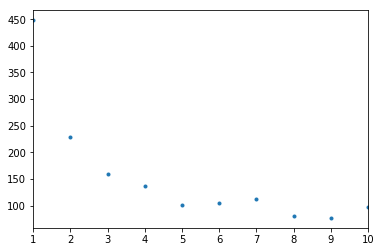

In [5]:
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 2653)

df["num_song_in_album"] = df.groupby("album_hash")["album_hash"].transform("count")
df1 = df[df.num_song_in_album<=1]
print(df1.label.mean())
df1.label.value_counts().plot(style=".")
# df1.label.value_counts()

In [79]:
a1 = df[df.length<30]
a1

,index,ID,title,artist_name,artist_id,composers_name,composers_id,release_time,label,dataset,...,dayofyear,year,month,hour,day,weekday,hourandday_release,isartist_composer,artist_id_min,artist_id_min_cat
152,129,1075810992,Hương Đồng Gió Nội,"Bảo Hân, Như Loan, Hương Thủy","855,513,870",Song Ngọc,100288,2017-10-01 21:33:00,10.0,train,...,274,2017,10,21,1,6,281,0,513,55
159,135,1075811002,"Liên Khúc : Mưa Rừng, Anh Cho Em Mùa Xuân, Đàn Bà",Hợp Ca,29668,Song Ngọc,100288,2017-10-01 21:33:00,5.0,train,...,274,2017,10,21,1,6,281,0,29668,551
868,766,1076340538,Xin Làm Người Xa Lạ,Lưu Ánh Loan,5494,Tú Nhi,101512,2017-08-08 19:26:00,3.0,train,...,220,2017,8,19,8,1,32,0,5494,235
869,767,1076340539,Trăng Tàn Trên Hè Phố,Lưu Ánh Loan,5494,Phạm Thế Mỹ,100354,2017-08-08 19:26:00,3.0,train,...,220,2017,8,19,8,1,32,0,5494,235
870,768,1076340540,Tấm Ảnh Không Hồn,Lưu Ánh Loan,5494,"Lê Dinh, Hoài An",100299.100133,2017-08-08 19:26:00,3.0,train,...,220,2017,8,19,8,1,32,0,5494,235
871,769,1076340541,Quán Nửa Khuya,Lưu Ánh Loan,5494,"Tuấn Khanh, Hoài Linh",100071.10031,2017-08-08 19:26:00,4.0,train,...,220,2017,8,19,8,1,32,0,5494,235
872,770,1076340542,Một Người Đi,Lưu Ánh Loan,5494,Mai Châu,103425,2017-08-08 19:26:00,3.0,train,...,220,2017,8,19,8,1,32,0,5494,235
873,771,1076340543,Liên Khúc Đừng Nói Xa Nhau,Lưu Ánh Loan,5494,Nhiều Tác Giả,101740,2017-08-08 19:26:00,3.0,train,...,220,2017,8,19,8,1,32,0,5494,235
874,772,1076340544,Giọt Buồn Không Tên,Lưu Ánh Loan,5494,Tô Giang,104411,2017-08-08 19:26:00,2.0,train,...,220,2017,8,19,8,1,32,0,5494,235
1539,1370,1076385719,Intro I Lab You,Tiên Tiên,59804,Tiên Tiên,59804,2017-09-21 06:00:00,4.0,train,...,264,2017,9,6,21,3,228,1,59804,776


In [6]:
for i,o in df1.iterrows():
    print(o.ID,"------",o.album,"--------", o.genre,"------",o.artist_name,"---",o.track,"---",o.label)

1075810275 ------ Liên Khúc Đón Xuân -------- Nhạc Trẻ ------ Tạ Hoàng Nguyên --- (1, 1) --- 6.0
1075810599 ------ Chú Rể Không Phải Anh -------- Nhạc Trẻ ------ Tào Lữ Phụ --- (1, 1) --- nan
1075810849 ------ Đừng Để Xuân Đến Gần (Single) -------- Nhạc Trẻ ------ Lệ Nam --- (1, 1) --- 5.0
1075810867 ------ Nhạc Phật Giáo (Vol.2) -------- Nhạc Đạo ------ Kim Linh --- (12, 12) --- 4.0
1075811223 ------ Khi Anh Đã Yêu -------- Nhạc Trẻ ------ Thiên Dũng --- (1, 2) --- 8.0
1075811593 ------ Điều Em Muốn (Single) -------- Nhạc Trẻ ------ Tia Hải Châu --- (1, 1) --- 2.0
1075834004 ------ Câu Chuyện Làm Quen -------- Nhạc Trẻ ------ Quốc Thiên --- (1, 1) --- 1.0
1075834188 ------ I Need Your Love -------- Nhạc Trẻ ------ Sĩ Thanh --- (1, 1) --- 1.0
1075834846 ------ Là Vì Em -------- Nhạc Trẻ ------ Bạch Công Khanh --- (1, 1) --- 2.0
1075834917 ------ We Hear You (Single) -------- Nhạc Trẻ ------ Karik, DJ XILLIX --- (1, 1) --- 1.0
1075835121 ------ Có Những Yêu Thương (Single) -------- Nh

1076439259 ------ Anh Vui Là Được (Single) -------- Nhạc Trẻ ------ Kim Ny Ngọc --- (1, 2) --- 3.0
1076439260 ------ 1 Lần (Remix Single) -------- Nhạc Trẻ ------ SlimV, Trọng Hiếu --- (1, 1) --- 1.0
1076439261 ------ Ước Mơ Của Mẹ (Single) -------- nan ------ Hồ Minh Quân --- (1, 2) --- 6.0
1076441430 ------ Em Trong Mắt Tôi (DJ Minh Trí Remix) -------- Nhạc Trẻ ------ DJ Minh Trí --- (1, 1) --- 3.0
1076441594 ------ Nhớ Ơn Thượng Sư (Single) -------- Nhạc Tôn Giáo ------ Châu Ý Linh --- (1, 1) --- 7.0
1076441598 ------ Này Em Ơi... Mình Yêu Thôi (Single) -------- Nhạc Trẻ ------ Thế Bảo, NamKun --- (1, 1) --- 1.0
1076441621 ------ Chuyện Tình Không Dĩ vãng (Single) -------- Trữ Tình & Bolero ------ Bảo Thắng --- (1, 1) --- 7.0
1076441669 ------ Lời Sám Hối Muộn Màng (Single) -------- Nhạc Trẻ ------ Gia Huy --- (1, 1) --- 1.0
1076441804 ------ Rock Sài Gòn Rêu Phong -------- Nhạc Trẻ ------ MTV --- (1, 1) --- nan
1076441808 ------ Già (Single) -------- Nhạc Trẻ ------ Da LAB --- (1, 

1078056956 ------ Để Em Lo (Single) -------- Nhạc Trẻ ------ Võ Ê Vo --- (1, 1) --- 1.0
1078057105 ------ Yêu Thương Giờ Như Xa Lạ (Single) -------- Nhạc Trẻ ------ Hải Ngô --- (2, 2) --- 5.0
1078057433 ------ Đừng Xa Tôi (Single) -------- Nhạc Trẻ ------ Wendy Thảo --- (1, 1) --- 1.0
1078057474 ------ Là Do Anh (Single) -------- Nhạc Trẻ ------ Henry, Hy Dương --- (1, 1) --- 3.0
1078057566 ------ Cùng Em (Single) -------- Nhạc Trẻ ------ Nhật Thái, Phạm Tuấn Tài --- (1, 1) --- 2.0
1078058057 ------ Đợi Em (Single) -------- Nhạc Trữ Tình ------ Oliver Lee --- (1, 1) --- 9.0
1078058058 ------ Người Tình (Single) -------- Nhạc Trữ Tình ------ Oliver Lee --- (1, 1) --- 10.0
1078058059 ------ Tình Dẫu Muộn Màng (Single) -------- Nhạc Trữ Tình ------ Oliver Lee --- (1, 1) --- 10.0
1078058245 ------ Mình Còn Lại Gì Trong Nhau (Single) -------- Nhạc Trẻ ------ KayC, Đậu Đen, Trung Trần --- (1, 1) --- 5.0
1078058372 ------ Mình Quên Nhau Chưa (Single) -------- Nhạc Trẻ ------ KayC, Đậu Đen, Tr

1078138638 ------ Liên Khúc Thiếu Nhi 16 No.2 (Single) -------- Nhạc Thiếu Nhi ------ Don Nguyễn --- (1, 1) --- 2.0
1078139276 ------ A Ă Â (Single) -------- Nhạc Thiếu Nhi ------ Đỗ Tuyết Nhi --- (1, 1) --- 3.0
1078139280 ------ Nếu Một Mai (Nhắm Mắt Thấy Mùa Hè OST) (Single) -------- Nhạc Phim ------ Uyên Pím (Bệt Band) --- (1, 1) --- 1.0
1078139287 ------ Cạn Lời (Single) -------- Nhạc Trẻ ------ Nhất Vũ --- (1, 1) --- 3.0
1078139340 ------ Mỉm Cười Cho Qua (Single) -------- Nhạc Trẻ ------ Lương Bích Hữu --- (1, 1) --- 1.0
1078139469 ------ Học Tiếng Mèo Kêu (Cover) (single) -------- Nhạc Trẻ ------ Huy Vạc, Ly Mít --- (1, 1) --- 1.0
1078139614 ------ Tây Du Kí (Remix) (Single) -------- Nhạc Dance ------ Nhất Vũ --- (1, 1) --- 4.0
1078139874 ------ Đừng Nói Xa Nhau (Single) -------- Nhạc Trữ Tình ------ Lâm Triệu Vỹ, Vân My --- (1, 1) --- 6.0
1078139888 ------ Căn Phòng Mơ Ước (Single) -------- Nhạc Trẻ ------ Various Artists --- (1, 1) --- 6.0
1078139890 ------ Hè Vội (Single) ---

1078216485 ------ Bước Đi (Single) -------- Nhạc Trẻ ------ Tuấn J.M, Lê Việt, Keinez --- (1, 1) --- nan
1078216510 ------ Em Cần Tiền Anh Cần Tình (Single) -------- Nhạc Trẻ ------ Khang Thế Hùng --- (2, 2) --- nan
1078216525 ------ Yêu Em Chẳng Dám Nói (Single) -------- Nhạc Trẻ ------ Lê Nguyên --- (1, 1) --- 7.0
1078216542 ------ Cuối Mùa Hoa Phượng (Single) -------- Nhạc Trẻ ------ INSOLENT, TOM, NALO, CM1X --- (1, 1) --- 7.0
1078216567 ------ Ngày Tình Phôi Pha (Touliver Remix) (Single) -------- Nhạc Trẻ ------ Lê Hiếu, Touliver --- (1, 1) --- nan
1078217070 ------ Âm Thanh Của Tuyết Rơi (Cover) (Single) -------- Nhạc Trẻ ------ Tuyết Mai --- (1, 1) --- 6.0
1078217349 ------ Đi Yêu Tin (Single) -------- Nhạc Trẻ ------ Lê Thiện Hiếu --- (1, 1) --- 5.0
1078218186 ------ Nàng Việt (Single) -------- Nhạc Trẻ ------ Thái Bình --- (1, 1) --- 5.0
1078218207 ------ Chuyện Tình Buồn (Single) -------- Nhạc Trẻ ------ Dương Kim Ánh --- (1, 1) --- 7.0
1078218216 ------ Phải Thế Thôi (Cover)

1078363867 ------ Bánh Xe Thời Gian (Single) -------- Rock Việt ------ Cụ Minh Rock --- (1, 1) --- 10.0
1078363869 ------ Run Or Die (Single) -------- Rock Việt ------ Cụ Minh Rock --- (1, 1) --- 10.0
1078363910 ------ Tâm Tư (Single) -------- Nhạc Trẻ ------ CM1X, Yun, Đình Thọ --- (1, 1) --- 4.0
1078364091 ------ Đêm Lạnh Tình Si (Single) -------- Nhạc Trẻ ------ Đinh Ứng Phi Trường --- (1, 1) --- 4.0
1078364148 ------ Boom Shakalaka (Single) -------- Nhạc Trẻ ------ Vũ Phụng Tiên, Addy Trần --- (1, 1) --- 5.0
1078365423 ------ Em Chỉ Muốn Yêu Thôi Mà (Single) -------- Nhạc Trẻ ------ MAEKO, Marutron --- (1, 1) --- 3.0
1078365669 ------ Quân Đoàn Park Hang Seo (Single) -------- Nhạc Trẻ ------ Từ Thức --- (1, 1) --- 7.0
1078365680 ------ Anh Đang Ở Đâu Đấy Anh (New Version) (Single) -------- Nhạc Trẻ ------ Hương Giang, Lê Minh Hiếu --- (1, 1) --- 3.0
1078372947 ------ Rời Xa Để Trưởng Thành (Single) -------- Nhạc Trẻ ------ Duy Zuno --- (1, 1) --- 2.0
1078374973 ------ Tự Hào Bóng Đ

In [47]:
df["album_right"] = df.groupby(df.release_time).ngroup()
# df["album_hash"] =  df.album_hash.fillna(df.album)
# a2 = df[df.album_hash.isnull()]

for i,o in df.iterrows():
    print(o.ID,"------",o.album,"--",o.album_hash,"---",o.release_time,"---", o.genre,"------",o.artist_name,"---",o.track,"---",o.label)
    
# plt.hist(a2[a2.dataset=="train"].label)

1073748245 ------ 30 Năm Viễn Xứ -- 3c5c7e72f9112800 --- 2017-10-01 22:07:00 --- Nhạc Trữ Tình ------ Như Quỳnh --- (2, 14) --- 7.0
1073751978 ------ Xin Còn Gọi Tên Nhau-Tình khúc Trường Sa -- f39df9c10843e3fc --- 2017-10-01 20:58:00 --- Nhạc Trữ Tình ------ Minh Tuyết --- (4, 18) --- 3.0
1073835561 ------ Tình Mộng (Top Hits 29) -- 073e387070f0f0f0 --- 2017-11-01 18:16:00 --- Nhạc Trẻ ------ Lưu Bích --- (6, 14) --- 6.0
1073856553 ------ Nối Lại Tình Xưa -- cdc0a7fb7b707060 --- 2017-11-01 17:36:00 --- Nhạc Trữ Tình ------ Như Quỳnh --- (9, 12) --- 2.0
1073929630 ------ Tình Lặng Câm -- 838f8f878de574f6 --- 2017-11-01 17:49:00 --- Nhạc Trữ Tình ------ Như Loan --- (1, 12) --- 7.0
1073929880 ------ Hà Nội Ngày Tháng Cũ (Tình khúc Song Ngọc) -- 81202020fafafe7b --- 2017-10-01 21:33:00 --- Nhạc Trữ Tình ------ Don Hồ --- (12, 13) --- 3.0
1073949310 ------ Yêu Một Người Sống Bên Một Người -- 2060802070ceffff --- 2017-11-01 18:27:00 --- Nhạc Trẻ ------ Minh Tuyết --- (1, 14) --- 4.0
107399

1075810920 ------ Hạ Buồn -- f3eebe2860640568 --- 2017-10-01 20:36:00 --- Nhạc Trữ Tình ------ Phương Diễm Hạnh --- (8, 10) --- nan
1075810921 ------ Hạ Buồn -- f3eebe2860640568 --- 2017-10-01 20:36:00 --- Nhạc Trữ Tình ------ Phương Diễm Hạnh --- (9, 10) --- 2.0
1075810936 ------ Giấc Mơ Cánh Cò -- 203634666f3c3c3c --- 2017-10-01 20:48:00 --- Nhạc Trữ Tình ------ Mạnh Đình, Mạnh Quỳnh, Trường Vũ --- (1, 9) --- nan
1075810937 ------ Giấc Mơ Cánh Cò -- 203634666f3c3c3c --- 2017-10-01 20:48:00 --- Nhạc Trữ Tình ------ Trường Vũ, Như Quỳnh --- (2, 9) --- 2.0
1075810939 ------ Giấc Mơ Cánh Cò -- 203634666f3c3c3c --- 2017-10-01 20:48:00 --- Nhạc Trữ Tình ------ Phương Diễm Hạnh --- (5, 9) --- 6.0
1075810940 ------ Giấc Mơ Cánh Cò -- 203634666f3c3c3c --- 2017-10-01 20:48:00 --- Nhạc Trữ Tình ------ Phi Nhung, Mạnh Quỳnh --- (6, 9) --- nan
1075810941 ------ Giấc Mơ Cánh Cò -- 203634666f3c3c3c --- 2017-10-01 20:48:00 --- Nhạc Trữ Tình ------ Tâm Đoan --- (7, 9) --- 3.0
1075810943 ------ Giấc M

1075811694 ------ Xuân Đến Rồi -- 3854fafb303cfc30 --- 2017-12-01 18:34:00 --- Nhạc Trữ Tình ------ Đông Đào --- (7, 10) --- 7.0
1075811695 ------ Xuân Đến Rồi -- 3854fafb303cfc30 --- 2017-12-01 18:34:00 --- Nhạc Trữ Tình ------ Tố My --- (9, 11) --- 6.0
1075811696 ------ Xuân Đến Rồi -- 3854fafb303cfc30 --- 2017-12-01 18:34:00 --- Nhạc Trữ Tình ------ Dương Minh Ngọc --- (9, 10) --- 4.0
1075811697 ------ Xuân Đến Rồi -- 3854fafb303cfc30 --- 2017-12-01 18:34:00 --- Nhạc Trữ Tình ------ Nguyễn Ngọc Sơn --- (10, 10) --- 5.0
1075811698 ------ Trái Tim Vàng Son -- 003c3e3c18647000 --- 2017-12-01 19:46:00 --- Nhạc Trẻ ------ Tiên Tiên --- (8, 8) --- 1.0
1075811699 ------ nan -- 0058583c6c7e3c10 --- 2017-12-01 20:43:00 --- Nhạc Trữ Tình ------ Lê Ngọc Thúy --- (None, None) --- 6.0
1075811701 ------ nan -- nan --- 2017-12-01 20:47:00 --- Nhạc Trẻ ------ P336 Band --- (None, None) --- 2.0
1075811746 ------ nan -- ffe743c3c3c3e3ef --- 2017-12-02 03:05:00 --- Nhạc Trẻ ------ Tuni Minh --- (None,

1076086943 ------ nan -- 4f0f070707070707 --- 2017-08-04 23:57:00 --- Nhạc Trẻ ------ Hoàng Kỳ Nam --- (None, None) --- 2.0
1076087064 ------ nan -- e7cbd9999918387c --- 2017-10-04 16:52:00 --- Nhạc Trẻ ------ Nipe --- (None, None) --- 3.0
1076093806 ------ Cô Gái Triệu Like (Single) -- 003c3e08073cf878 --- 2017-11-05 04:01:00 --- Nhạc Trẻ ------ Tino, Yuno --- (1, 2) --- 2.0
1076100433 ------ nan -- c35c4c1c1c1f3f7f --- 2017-10-04 15:52:00 --- Nhạc Trẻ ------ Trương Mộng Quỳnh --- (None, None) --- 5.0
1076101053 ------ Anh Sẽ Về Sớm Thôi (Single) -- ffbd9c9e80c02000 --- 2017-10-04 17:48:00 --- Nhạc Trẻ ------ Vũ Duy Khánh --- (1, 1) --- 1.0
1076101073 ------ Boleero -- efc7c3dbd3818181 --- 2017-10-04 17:51:00 --- Nhạc Trữ Tình ------ Nathan Lee --- (1, 6) --- 5.0
1076101074 ------ Boleero -- efc7c3dbd3818181 --- 2017-10-04 17:51:00 --- Nhạc Trữ Tình ------ Nathan Lee --- (2, 6) --- 4.0
1076101075 ------ Boleero -- efc7c3dbd3818181 --- 2017-10-04 17:51:00 --- Nhạc Trữ Tình ------ Natha

1076279638 ------ Giọt Nắng Bên Thềm -- Giọt Nắng Bên Thềm --- 2017-12-06 17:04:00 --- Nhạc Trữ Tình ------ Mạnh Đồng, Phan Ý Linh --- (1, 5) --- 4.0
1076279639 ------ Giọt Nắng Bên Thềm -- Giọt Nắng Bên Thềm --- 2017-12-06 17:04:00 --- Nhạc Trữ Tình ------ Mạnh Đồng --- (2, 5) --- 5.0
1076279640 ------ Giọt Nắng Bên Thềm -- Giọt Nắng Bên Thềm --- 2017-12-06 17:04:00 --- Nhạc Trữ Tình ------ Mạnh Đồng --- (3, 5) --- 4.0
1076279641 ------ Giọt Nắng Bên Thềm -- Giọt Nắng Bên Thềm --- 2017-12-06 17:04:00 --- Nhạc Trữ Tình ------ Mạnh Đồng --- (4, 5) --- 4.0
1076279654 ------ Giọt Nắng Bên Thềm -- Giọt Nắng Bên Thềm --- 2017-12-06 17:08:00 --- Nhạc Trữ Tình ------ Mạnh Đồng --- (6, 6) --- 5.0
1076279901 ------ Tình Em Tháp Mười -- 1f0f0f0f8f0f0703 --- 2017-12-06 20:13:00 --- Nhạc Trẻ ------ Ngọc Thảo, Hoàng Nhật Thái --- (3, 9) --- 4.0
1076279907 ------ Tình Em Tháp Mười -- 1f0f0f0f8f0f0703 --- 2017-12-06 20:13:00 --- Nhạc Trẻ ------ Ngọc Thảo, Triệu Quang Hà --- (9, 9) --- 4.0
1076280108 

1076332816 ------ Ngắm Hoa Lệ Rơi (Remix) -- e87c6e27270f0700 --- 2017-07-31 23:35:00 --- Nhạc Dance ------ Châu Khải Phong --- (16, 16) --- 1.0
1076332825 ------ Em Đi Trên Cỏ Non -- e7c3c38018ffffff --- 2017-07-31 23:54:00 --- Nhạc Dân Ca - Quê Hương ------ Cẩm Loan --- (1, 9) --- 3.0
1076332826 ------ Em Đi Trên Cỏ Non -- e7c3c38018ffffff --- 2017-07-31 23:54:00 --- Nhạc Dân Ca - Quê Hương ------ Cẩm Loan --- (2, 9) --- 3.0
1076332827 ------ Em Đi Trên Cỏ Non -- e7c3c38018ffffff --- 2017-07-31 23:54:00 --- Nhạc Trữ Tình ------ Cẩm Loan --- (3, 9) --- 3.0
1076332828 ------ Em Đi Trên Cỏ Non -- e7c3c38018ffffff --- 2017-07-31 23:54:00 --- Nhạc Dân Ca - Quê Hương ------ Cẩm Loan --- (4, 9) --- 3.0
1076332830 ------ Em Đi Trên Cỏ Non -- e7c3c38018ffffff --- 2017-07-31 23:54:00 --- Nhạc Trữ Tình ------ Cẩm Loan --- (6, 9) --- 3.0
1076332831 ------ Em Đi Trên Cỏ Non -- e7c3c38018ffffff --- 2017-07-31 23:54:00 --- Nhạc Trữ Tình ------ Cẩm Loan, Cẩm Tú --- (7, 9) --- 3.0
1076332832 ------ E

1076346741 ------ nan -- nan --- 2017-08-15 01:28:00 --- Nhạc Cách Mạng ------ Nhóm Khát Vọng Xanh --- (None, None) --- 9.0
1076346742 ------ nan -- nan --- 2017-08-15 01:28:00 --- Nhạc Cách Mạng ------ Nhóm Khát Vọng Xanh --- (None, None) --- 5.0
1076346743 ------ nan -- 06437a3878f8f859 --- 2017-08-15 01:28:00 --- Nhạc Dân Ca - Quê Hương ------ Lương Chí Cường, Thụy Vân --- (None, None) --- 9.0
1076346744 ------ nan -- 06437a3878f8f859 --- 2017-08-15 01:28:00 --- Nhạc Dân Ca - Quê Hương ------ Lương Chí Cường --- (None, None) --- nan
1076346745 ------ nan -- 06437a3878f8f859 --- 2017-08-15 01:28:00 --- Nhạc Dân Ca - Quê Hương ------ Lương Chí Cường, Thụy Vân --- (None, None) --- 8.0
1076346746 ------ nan -- ffe7c7c7c3c38383 --- 2017-08-15 01:28:00 --- Nhạc Trẻ ------ Gia Linh --- (None, None) --- 9.0
1076346760 ------ nan -- c1efcf8f0f07070f --- 2017-08-15 01:42:00 --- Nhạc Trẻ ------ Đào Tín --- (None, None) --- 2.0
1076346831 ------ nan -- nan --- 2017-08-15 02:16:00 --- Nhạc Trữ T

1076359761 ------ Điều Ngốc Nghếch Nhất -- e7c3c3e1e1e3ffff --- 2017-08-25 17:20:00 --- Nhạc Trẻ ------ Hoàng Yến Chibi --- (7, 10) --- 2.0
1076359762 ------ Điều Ngốc Nghếch Nhất -- e7c3c3e1e1e3ffff --- 2017-08-25 17:20:00 --- Nhạc Trẻ ------ Hoàng Yến Chibi --- (8, 10) --- 2.0
1076359763 ------ Điều Ngốc Nghếch Nhất -- e7c3c3e1e1e3ffff --- 2017-08-25 17:20:00 --- Nhạc Trẻ ------ Hoàng Yến Chibi --- (9, 10) --- 2.0
1076359764 ------ Điều Ngốc Nghếch Nhất -- e7c3c3e1e1e3ffff --- 2017-08-25 17:20:00 --- Nhạc Trẻ ------ Hoàng Yến Chibi --- (10, 10) --- 1.0
1076360015 ------ Giá Như Trên Đời Chỉ Cần Tình Yêu (Single) -- e3e3a7a767c7c1e5 --- 2017-08-25 22:16:00 --- Nhạc Trẻ ------ Cao Thái Sơn --- (1, 1) --- 1.0
1076360058 ------ Duyên Phận 2 -- 006070f0f2fb3030 --- 2017-08-25 23:03:00 --- Nhạc Trữ Tình ------ Linh Nguyễn, Dương Hồng Loan --- (9, 10) --- 1.0
1076360059 ------ Duyên Phận 2 -- 006070f0f2fb3030 --- 2017-08-25 23:03:00 --- Nhạc Trữ Tình ------ Linh Nguyễn, Bùi Thu Huyền --- (1

1076380391 ------ Người Em Tìm Kiếm (Single) -- ffff9f8680880139 --- 2017-09-16 03:00:00 --- Nhạc Trẻ ------ MIN --- (1, 1) --- 1.0
1076380874 ------ nan -- c099bd3f1a024202 --- 2017-09-16 22:13:00 --- Nhạc Trẻ ------ Phạm Đình Thái Ngân --- (None, None) --- 5.0
1076380875 ------ nan -- c099bd3f1a024202 --- 2017-09-16 22:13:00 --- Nhạc Trẻ ------ Phạm Đình Thái Ngân --- (None, None) --- 5.0
1076380876 ------ nan -- c099bd3f1a024202 --- 2017-09-16 22:13:00 --- Nhạc Trẻ ------ Phạm Đình Thái Ngân --- (None, None) --- 1.0
1076380998 ------ nan -- 0844e4ec8cecccec --- 2017-09-17 00:27:00 --- Nhạc Trẻ ------ Lưu Minh Tuấn --- (None, None) --- 5.0
1076381884 ------ Mơ (Single) -- fffff0f08081ffff --- 2017-09-18 01:12:00 --- Nhạc Trẻ ------ RHY --- (1, 1) --- 2.0
1076382384 ------ Tiếng Hát Yên Nhiên, Vol.3: Những Tuyệt Phẩm Của Nhạc Sĩ Trúc Phương -- dcbebcbcbc978080 --- 2017-09-18 16:09:00 --- Nhạc Trữ Tình ------ Yên Nhiên --- (2, 6) --- nan
1076382385 ------ Tiếng Hát Yên Nhiên, Vol.3: Nh

1076392626 ------ Kiss Of The Sea (Nụ Hôn Của Biển) -- 3cc0fcce021f4f00 --- 2017-09-27 22:10:00 --- Nhạc Không Lời ------ Võ Thiện Thanh --- (1, 2) --- 10.0
1076392630 ------ Kiss Of The Sea (Nụ Hôn Của Biển) -- 3cc0fcce021f4f00 --- 2017-09-27 22:13:00 --- Nhạc Không Lời ------ Võ Thiện Thanh --- (1, 3) --- 10.0
1076392631 ------ Kiss Of The Sea (Nụ Hôn Của Biển) -- 3cc0fcce021f4f00 --- 2017-09-27 22:14:00 --- Nhạc Không Lời ------ Võ Thiện Thanh --- (1, 4) --- 10.0
1076392632 ------ Kiss Of The Sea (Nụ Hôn Của Biển) -- 3cc0fcce021f4f00 --- 2017-09-27 22:14:00 --- Nhạc Không Lời ------ Võ Thiện Thanh --- (1, 5) --- 10.0
1076392633 ------ Kiss Of The Sea (Nụ Hôn Của Biển) -- 3cc0fcce021f4f00 --- 2017-09-27 22:15:00 --- Nhạc Không Lời ------ Võ Thiện Thanh --- (1, 6) --- 10.0
1076392635 ------ Kiss Of The Sea (Nụ Hôn Của Biển) -- 3cc0fcce021f4f00 --- 2017-09-27 22:16:00 --- Nhạc Không Lời ------ Võ Thiện Thanh --- (1, 7) --- 10.0
1076392636 ------ Kiss Of The Sea (Nụ Hôn Của Biển) -- 3cc

1076405445 ------ nan -- 28002627be7fff9c --- 2017-12-11 00:44:00 --- Nhạc Trữ Tình ------ Nguyễn Linh, Phi Bằng --- (None, None) --- 5.0
1076405449 ------ Hạnh Phúc Của Riêng Anh -- 00204c5c7b7c6246 --- 2017-12-10 23:18:00 --- Nhạc Dance ------ Trương Khải Minh, Yuki Huy Nam --- (8, 8) --- 1.0
1076405450 ------ Hạnh Phúc Của Riêng Anh -- 00204c5c7b7c6246 --- 2017-12-10 23:18:00 --- Nhạc Dance ------ Trương Khải Minh --- (7, 8) --- 3.0
1076405451 ------ Hạnh Phúc Của Riêng Anh -- 00204c5c7b7c6246 --- 2017-12-10 23:18:00 --- Nhạc Trẻ ------ Trương Khải Minh --- (6, 8) --- 2.0
1076405453 ------ Hạnh Phúc Của Riêng Anh -- 00204c5c7b7c6246 --- 2017-12-10 23:18:00 --- Nhạc Trẻ ------ Trương Khải Minh --- (4, 8) --- 3.0
1076405454 ------ Hạnh Phúc Của Riêng Anh -- 00204c5c7b7c6246 --- 2017-12-10 23:18:00 --- Nhạc Trẻ ------ Trương Khải Minh --- (3, 8) --- 6.0
1076405455 ------ Hạnh Phúc Của Riêng Anh -- 00204c5c7b7c6246 --- 2017-12-10 23:18:00 --- Nhạc Trẻ ------ Trương Khải Minh --- (2, 8) 

1076418723 ------ Đường Xưa Lối Cũ -- fe3f3964270f433e --- 2017-10-26 17:29:00 --- Nhạc Trữ Tình ------ Tuấn Tú --- (8, 15) --- 7.0
1076418724 ------ Đường Xưa Lối Cũ -- fe3f3964270f433e --- 2017-10-26 17:29:00 --- Nhạc Trữ Tình ------ Tuấn Tú --- (7, 15) --- 7.0
1076418725 ------ Đường Xưa Lối Cũ -- fe3f3964270f433e --- 2017-10-26 17:29:00 --- Nhạc Trữ Tình ------ Tuấn Tú --- (6, 15) --- 7.0
1076418726 ------ Đường Xưa Lối Cũ -- fe3f3964270f433e --- 2017-10-26 17:29:00 --- Nhạc Trữ Tình ------ Tuấn Tú --- (5, 15) --- 6.0
1076418727 ------ Đường Xưa Lối Cũ -- fe3f3964270f433e --- 2017-10-26 17:29:00 --- Nhạc Trữ Tình ------ Tuấn Tú --- (4, 15) --- 7.0
1076418728 ------ Đường Xưa Lối Cũ -- fe3f3964270f433e --- 2017-10-26 17:29:00 --- Nhạc Trữ Tình ------ Tuấn Tú --- (3, 15) --- 8.0
1076418730 ------ Đường Xưa Lối Cũ -- fe3f3964270f433e --- 2017-10-26 17:29:00 --- Nhạc Trữ Tình ------ Tuấn Tú --- (1, 15) --- nan
1076418746 ------ Cỏ Úa - Có Thế thôi -- f3f3fff9181e0400 --- 2017-10-26 17:

1076436318 ------ Nếu Được Làm Người Tình -- 001c3c2e27278787 --- 2017-11-15 23:16:00 --- Trữ Tình & Bolero ------ Giang Trường --- (3, 13) --- 3.0
1076436319 ------ Nếu Được Làm Người Tình -- 001c3c2e27278787 --- 2017-11-15 23:16:00 --- Trữ Tình & Bolero ------ Giang Trường, Phương Cẩm Ngọc --- (2, 13) --- 3.0
1076436320 ------ Nếu Được Làm Người Tình -- 001c3c2e27278787 --- 2017-11-15 23:16:00 --- Trữ Tình & Bolero ------ Giang Trường --- (1, 13) --- 3.0
1076436439 ------ Nếu Được Làm Người Tình -- 001c3c2e27278787 --- 2017-11-16 00:21:00 --- Nhạc Trẻ ------ Giang Trường, Giang Thanh --- (1, 14) --- 3.0
1076436452 ------ Nhớ Nhau Trong Đời -- 78183c781091d9f9 --- 2017-11-16 00:32:00 --- Trữ Tình & Bolero ------ Giang Trường --- (6, 6) --- 3.0
1076436453 ------ Nhớ Nhau Trong Đời -- 78183c781091d9f9 --- 2017-11-16 00:32:00 --- Trữ Tình & Bolero ------ Giang Trường --- (5, 6) --- 3.0
1076436454 ------ Nhớ Nhau Trong Đời -- 78183c781091d9f9 --- 2017-11-16 00:32:00 --- Trữ Tình & Bolero 

1076442296 ------ Xóa Sạch Hết Đi (Single) -- 0410387c62373fff --- 2017-11-21 18:43:00 --- Nhạc Trẻ ------ Cao Nam Thành --- (1, 6) --- 6.0
1076442365 ------ MỘC - Nhạc Vàng Muôn Thuở -- 072727373978f870 --- 2017-11-21 21:11:00 --- Trữ Tình & Bolero ------ Việt Tú --- (11, 11) --- 6.0
1076442366 ------ MỘC - Nhạc Vàng Muôn Thuở -- 072727373978f870 --- 2017-11-21 21:11:00 --- Trữ Tình & Bolero ------ Việt Tú --- (10, 11) --- 5.0
1076442367 ------ MỘC - Nhạc Vàng Muôn Thuở -- 072727373978f870 --- 2017-11-21 21:11:00 --- Trữ Tình & Bolero ------ Việt Tú --- (9, 11) --- 6.0
1076442369 ------ MỘC - Nhạc Vàng Muôn Thuở -- 072727373978f870 --- 2017-11-21 21:11:00 --- Trữ Tình & Bolero ------ Việt Tú --- (7, 11) --- 6.0
1076442370 ------ MỘC - Nhạc Vàng Muôn Thuở -- 072727373978f870 --- 2017-11-21 21:11:00 --- Trữ Tình & Bolero ------ Việt Tú --- (6, 11) --- 6.0
1076442371 ------ MỘC - Nhạc Vàng Muôn Thuở -- 072727373978f870 --- 2017-11-21 21:11:00 --- Trữ Tình & Bolero ------ Việt Tú --- (5, 

1076456885 ------ Mùa Thu Trong Mưa -- 0008083839797b7f --- 2017-08-13 01:30:00 --- Trữ Tình & Bolero ------ Quang Thắng --- (4, 12) --- 9.0
1076456887 ------ Mùa Thu Trong Mưa -- 0008083839797b7f --- 2017-08-13 01:30:00 --- Trữ Tình & Bolero ------ Quang Thắng --- (2, 12) --- 9.0
1076456888 ------ Mùa Thu Trong Mưa -- 0008083839797b7f --- 2017-08-13 01:30:00 --- Trữ Tình & Bolero ------ Quang Thắng --- (1, 12) --- 7.0
1076456891 ------ nan -- efcfdfc38b0b0b01 --- 2017-08-13 01:46:00 --- Trữ Tình & Bolero ------ Hoàng Khánh Long, Kỷ Quốc --- (None, None) --- 9.0
1076456892 ------ nan -- nan --- 2017-08-13 01:46:00 --- Trữ Tình & Bolero ------ Hoàng Khánh Long --- (None, None) --- 10.0
1076456893 ------ nan -- nan --- 2017-08-13 01:46:00 --- Trữ Tình & Bolero ------ Hoàng Khánh Long --- (None, None) --- nan
1076456894 ------ nan -- nan --- 2017-08-13 01:46:00 --- Nhạc Trẻ ------ Hoàng Khánh Long --- (None, None) --- 7.0
1076456895 ------ nan -- f1f1f9b911010100 --- 2017-08-13 01:46:00 -

1076463913 ------ Chuyện Tình Belém -- 0a6f7f40180d093d --- 2017-12-19 00:06:00 --- Nhạc Tôn Giáo ------ Huỳnh Hữu Kỳ --- (11, 13) --- nan
1076463914 ------ Chuyện Tình Belém -- 0a6f7f40180d093d --- 2017-12-19 00:06:00 --- Nhạc Tôn Giáo ------ Huỳnh Hữu Kỳ --- (10, 13) --- 9.0
1076463915 ------ Chuyện Tình Belém -- 0a6f7f40180d093d --- 2017-12-19 00:06:00 --- Nhạc Tôn Giáo ------ Huỳnh Hữu Kỳ --- (9, 13) --- 10.0
1076463918 ------ Chuyện Tình Belém -- 0a6f7f40180d093d --- 2017-12-19 00:06:00 --- Nhạc Tôn Giáo ------ Huỳnh Hữu Kỳ --- (6, 13) --- nan
1076463919 ------ Chuyện Tình Belém -- 0a6f7f40180d093d --- 2017-12-19 00:06:00 --- Nhạc Tôn Giáo ------ Huỳnh Hữu Kỳ --- (5, 13) --- 7.0
1076463921 ------ Chuyện Tình Belém -- 0a6f7f40180d093d --- 2017-12-19 00:06:00 --- Nhạc Tôn Giáo ------ Huỳnh Hữu Kỳ --- (3, 13) --- 9.0
1076463922 ------ Chuyện Tình Belém -- 0a6f7f40180d093d --- 2017-12-19 00:06:00 --- Nhạc Tôn Giáo ------ Huỳnh Hữu Kỳ --- (2, 13) --- 9.0
1076463928 ------ Ở Trong Thành

1078009216 ------ Nơi Thời Gian Ngừng Lại -- 137f7ff3f37f2000 --- 2017-12-28 17:53:00 --- Nhạc Trẻ ------ Việt Tú --- (1, 5) --- nan
1078009219 ------ Nơi Thời Gian Ngừng Lại -- 137f7ff3f37f2000 --- 2017-12-28 17:53:00 --- Nhạc Trẻ ------ Việt Tú --- (4, 5) --- 8.0
1078009379 ------ nan -- c38383c3c3b3ff1f --- 2017-12-28 18:45:00 --- Nhạc Trẻ ------ Bùi Vĩnh Phúc (Hot Boy Kẹo Kéo) --- (None, None) --- 3.0
1078009405 ------ Giao Thừa Chúc Xuân -- 8008181c7e7e3e18 --- 2017-12-28 19:06:00 --- Nhạc Trẻ ------ Lâm Chấn Kiệt --- (1, 5) --- 6.0
1078009406 ------ Giao Thừa Chúc Xuân -- 8008181c7e7e3e18 --- 2017-12-28 19:06:00 --- Nhạc Trẻ ------ Lâm Chấn Kiệt --- (2, 5) --- 6.0
1078009407 ------ Giao Thừa Chúc Xuân -- 8008181c7e7e3e18 --- 2017-12-28 19:06:00 --- Nhạc Trẻ ------ Lâm Chấn Kiệt --- (3, 5) --- 5.0
1078009408 ------ Giao Thừa Chúc Xuân -- 8008181c7e7e3e18 --- 2017-12-28 19:06:00 --- Nhạc Trẻ ------ Lâm Chấn Kiệt --- (4, 5) --- nan
1078009409 ------ Giao Thừa Chúc Xuân -- 8008181c7e

1078015128 ------ nan -- 8183c3c7c787c1c0 --- 2018-04-02 01:43:00 --- Nhạc Trẻ ------ Phan Ann, Mons --- (None, None) --- 2.0
1078015130 ------ nan -- 8183c3c7c787c1c0 --- 2018-04-02 01:43:00 --- Nhạc Trẻ ------ Phan Ann --- (None, None) --- 2.0
1078015131 ------ nan -- 8183c3c7c787c1c0 --- 2018-04-02 01:43:00 --- Nhạc Trẻ ------ Phan Ann --- (None, None) --- 1.0
1078015132 ------ nan -- 8183c3c7c787c1c0 --- 2018-04-02 01:43:00 --- Nhạc Trẻ ------ Phan Ann --- (None, None) --- 1.0
1078015133 ------ nan -- 8183c3c7c787c1c0 --- 2018-04-02 01:43:00 --- Nhạc Trẻ ------ Phan Ann --- (None, None) --- nan
1078015134 ------ nan -- 8183c3c7c787c1c0 --- 2018-04-02 01:43:00 --- Nhạc Trẻ ------ Phan Ann --- (None, None) --- nan
1078015137 ------ Không Ai Chọn Sự Cô Đơn (Single) -- cfcfef9f0f070703 --- 2018-04-02 01:59:00 --- Nhạc Trẻ ------ Hồ Thiện Quân --- (1, 2) --- nan
1078015138 ------ Không Ai Chọn Sự Cô Đơn (Single) -- cfcfef9f0f070703 --- 2018-04-02 01:59:00 --- Nhạc Trẻ ------ Hồ Thiện Qu

1078021648 ------ Buồn Của Anh (Cover) (Single) -- 20ffdf9faccc8c04 --- 2018-12-01 21:41:00 --- Nhạc Trẻ ------ Nguyễn Bảo Linh --- (1, 1) --- 5.0
1078021676 ------ Tình Như Lá Bay Xa (Remix) (Single) -- 1084fdf8f8f8f34e --- 2018-12-01 22:24:00 --- Nhạc Trẻ ------ Thành Đại Siêu --- (1, 2) --- 3.0
1078021677 ------ Tình Như Lá Bay Xa (Remix) (Single) -- 1084fdf8f8f8f34e --- 2018-12-01 22:24:00 --- Nhạc Trẻ ------ Thành Đại Siêu --- (2, 2) --- 6.0
1078021858 ------ Tâm Tình Đầu Xuân (Single) -- a1e119b1b3dbdbf7 --- 2018-12-02 00:37:00 --- Nhạc Trẻ ------ Gia Huy --- (1, 1) --- 6.0
1078022188 ------ Không Sao Đâu (Single) -- e2fe3f0f0fe46428 --- 2018-12-02 04:55:00 --- Nhạc Trẻ ------ Trịnh Thăng Bình --- (1, 1) --- 1.0
1078022295 ------ Khi Đã Yêu Anh -- bbf9b9b9b9911000 --- 2018-01-13 07:10:00 --- Nhạc Trữ Tình ------ Trúc Linh – Trúc Lam --- (1, 11) --- 6.0
1078022296 ------ Khi Đã Yêu Anh -- bbf9b9b9b9911000 --- 2018-01-13 07:10:00 --- Nhạc Trữ Tình ------ Trúc Linh --- (2, 11) --- 9

1078027982 ------ Nói Với Người Tình -- ddc8e4e62730c1e3 --- 2018-01-19 01:27:00 --- Nhạc Trữ Tình ------ Lưu Ánh Loan, Huỳnh Trường Thịnh --- (13, 14) --- 3.0
1078027983 ------ Nói Với Người Tình -- ddc8e4e62730c1e3 --- 2018-01-19 01:27:00 --- Nhạc Trữ Tình ------ Lưu Ánh Loan, Huỳnh Trường Thịnh --- (14, 14) --- 3.0
1078027984 ------ nan -- f3e3e1f39f030101 --- 2018-01-19 01:27:00 --- Nhạc Trữ Tình ------ KBin, Đạt JeNoo --- (None, None) --- 7.0
1078028536 ------ Yêu Thôi Anh Ah (Single) -- ffff07800b021f0f --- 2018-01-19 17:12:00 --- Nhạc Trẻ ------ Vân Shi, Chi Dân, Him Phạm --- (2, 3) --- nan
1078028578 ------ Đắm Trong Cay Đắng (New Version) (Single) -- 9c30f0f010081e1c --- 2018-01-19 17:55:00 --- Nhạc Trẻ ------ Lương Bích Hữu --- (1, 1) --- 1.0
1078028584 ------ Party Up (Single) -- fffff7e7c3c3e3ff --- 2018-01-19 18:00:00 --- Nhạc Trẻ ------ Tuấn Hii, Mun Phạm --- (6, 6) --- 5.0
1078028593 ------ Hoa Mười Giờ -- fff190181b1987c7 --- 2018-01-19 18:26:00 --- Nhạc Trữ Tình ------

1078032138 ------ nan -- 00001a163f3f180c --- 2018-01-22 21:24:00 --- Nhạc Trữ Tình ------ Hoàng Minh Thắng --- (None, None) --- 10.0
1078032139 ------ nan -- 00001a163f3f180c --- 2018-01-22 21:24:00 --- Nhạc Trữ Tình ------ Hoàng Minh Thắng --- (None, None) --- 10.0
1078032140 ------ nan -- 00001a163f3f180c --- 2018-01-22 21:24:00 --- Nhạc Trữ Tình ------ Hoàng Minh Thắng --- (None, None) --- 10.0
1078032141 ------ nan -- 00001a163f3f180c --- 2018-01-22 21:24:00 --- Nhạc Trữ Tình ------ Hoàng Minh Thắng --- (None, None) --- 10.0
1078032159 ------ Tôi Hát Nhạc Tình -- e0e0e2e6fcfcf810 --- 2018-01-22 21:45:00 --- Nhạc Trữ Tình ------ Hoàng Minh Thắng --- (1, 15) --- 10.0
1078032160 ------ Tôi Hát Nhạc Tình -- e0e0e2e6fcfcf810 --- 2018-01-22 21:45:00 --- Nhạc Trữ Tình ------ Hoàng Minh Thắng --- (2, 15) --- 7.0
1078032161 ------ Tôi Hát Nhạc Tình -- e0e0e2e6fcfcf810 --- 2018-01-22 21:45:00 --- Nhạc Trữ Tình ------ Hoàng Minh Thắng --- (3, 15) --- 9.0
1078032162 ------ Tôi Hát Nhạc Tình -

1078039912 ------ Buồn Của Em -- f7e7e248187cfc18 --- 2018-01-31 01:18:00 --- Nhạc Trẻ ------ Saka Trương Tuyền --- (2, 16) --- 1.0
1078039913 ------ Buồn Của Em -- f7e7e248187cfc18 --- 2018-01-31 01:18:00 --- Nhạc Trẻ ------ Saka Trương Tuyền --- (3, 16) --- 1.0
1078039914 ------ Buồn Của Em -- f7e7e248187cfc18 --- 2018-01-31 01:18:00 --- Nhạc Trẻ ------ Saka Trương Tuyền --- (4, 16) --- nan
1078039915 ------ Buồn Của Em -- f7e7e248187cfc18 --- 2018-01-31 01:18:00 --- Nhạc Trẻ ------ Saka Trương Tuyền, Lưu Chí Vỹ --- (5, 16) --- 1.0
1078039917 ------ Buồn Của Em -- f7e7e248187cfc18 --- 2018-01-31 01:18:00 --- Nhạc Trẻ ------ Saka Trương Tuyền --- (7, 16) --- 1.0
1078039918 ------ Buồn Của Em -- f7e7e248187cfc18 --- 2018-01-31 01:18:00 --- Nhạc Trẻ ------ Saka Trương Tuyền --- (8, 16) --- nan
1078039919 ------ Buồn Của Em -- f7e7e248187cfc18 --- 2018-01-31 01:18:00 --- Nhạc Trẻ ------ Saka Trương Tuyền --- (9, 16) --- 1.0
1078039920 ------ Buồn Của Em -- f7e7e248187cfc18 --- 2018-01-31

1078043169 ------ Tâm Sự Ngày Xuân -- fc38fefe7e1f0e0c --- 2018-02-03 00:14:00 --- Nhạc Trữ Tình ------ Thu Hồng Bolero --- (9, 9) --- 4.0
1078043230 ------ Xuân 2018 Bay Remix -- 639358c088ff6e7e --- 2018-02-03 00:34:00 --- Nhạc Trẻ ------ Trương Khải Minh, DJ Eric T-J --- (1, 8) --- 6.0
1078043231 ------ Xuân 2018 Bay Remix -- 639358c088ff6e7e --- 2018-02-03 00:34:00 --- Nhạc Dance ------ Trương Khải Minh --- (1, 8) --- 5.0
1078043232 ------ Xuân 2018 Bay Remix -- 639358c088ff6e7e --- 2018-02-03 00:34:00 --- Nhạc Trẻ ------ Trương Khải Minh, DJ Eric T-J --- (4, 8) --- 5.0
1078043233 ------ Xuân 2018 Bay Remix -- 639358c088ff6e7e --- 2018-02-03 00:34:00 --- Nhạc Trẻ ------ Trương Khải Minh --- (3, 8) --- nan
1078043234 ------ Xuân 2018 Bay Remix -- 639358c088ff6e7e --- 2018-02-03 00:34:00 --- Nhạc Trẻ ------ Trương Khải Minh --- (5, 8) --- 5.0
1078043297 ------ nan -- 0000183c7e7e7e1e --- 2018-09-02 16:47:00 --- Nhạc Trẻ ------ Bùi Công Nam --- (None, None) --- 1.0
1078043395 ------ M

1078048159 ------ Hai Mùa Noel -- 00181830f67ffe18 --- 2018-09-02 18:08:00 --- Nhạc Trữ Tình ------ Hoài Phong --- (3, 3) --- 7.0
1078048162 ------ Tết Miền Tây -- 86dfda9ae43c3830 --- 2018-09-02 18:13:00 --- Nhạc Trữ Tình ------ Lâm Hoài Phong --- (1, 4) --- 8.0
1078048163 ------ Tết Miền Tây -- 86dfda9ae43c3830 --- 2018-09-02 18:13:00 --- Nhạc Trữ Tình ------ Hoài Phong --- (2, 4) --- nan
1078048164 ------ Tết Miền Tây -- 86dfda9ae43c3830 --- 2018-09-02 18:13:00 --- Nhạc Trữ Tình ------ Lâm Hoài Phong --- (3, 4) --- 9.0
1078048165 ------ Tết Miền Tây -- 86dfda9ae43c3830 --- 2018-09-02 18:13:00 --- Nhạc Trữ Tình ------ Hoài Phong --- (4, 4) --- 7.0
1078048236 ------ Tết Nay Đã Về (Single) -- 202030787c78f8f0 --- 2018-09-02 19:44:00 --- Nhạc Trẻ ------ Trương Thảo Nhi, RTee --- (1, 2) --- 7.0
1078048237 ------ Tết Nay Đã Về (Single) -- 202030787c78f8f0 --- 2018-09-02 19:44:00 --- Nhạc Trẻ ------ Trương Thảo Nhi, RTee --- (2, 2) --- nan
1078048563 ------ Khúc Xuân -- c1c1e7e33f3c3c10 --

1078057105 ------ Yêu Thương Giờ Như Xa Lạ (Single) -- 7070787f7f6e7e3e --- 2018-02-26 21:28:00 --- Nhạc Trẻ ------ Hải Ngô --- (2, 2) --- 5.0
1078057110 ------ Ước Nguyện Đầu Xuân -- 00080f1f37371f1c --- 2018-02-26 21:39:00 --- Nhạc Trữ Tình ------ Hồ Gia Tuấn --- (3, 5) --- 8.0
1078057111 ------ Ước Nguyện Đầu Xuân -- 00080f1f37371f1c --- 2018-02-26 21:39:00 --- Nhạc Trữ Tình ------ Hồ Gia Tuấn --- (4, 5) --- 10.0
1078057112 ------ Ước Nguyện Đầu Xuân -- 00080f1f37371f1c --- 2018-02-26 21:39:00 --- Nhạc Trữ Tình ------ Hồ Gia Tuấn --- (5, 5) --- 10.0
1078057433 ------ Đừng Xa Tôi (Single) -- cf87878383e1e1ff --- 2018-02-26 23:57:00 --- Nhạc Trẻ ------ Wendy Thảo --- (1, 1) --- 1.0
1078057462 ------ Nhạc Tình Quê Hương -- 8fc76f5f0f0f0f03 --- 2018-02-27 00:08:00 --- Nhạc Dân Ca - Quê Hương ------ Tiết Duy Hòa --- (1, 10) --- 4.0
1078057463 ------ Nhạc Tình Quê Hương -- 8fc76f5f0f0f0f03 --- 2018-02-27 00:08:00 --- Nhạc Dân Ca - Quê Hương ------ Tiết Duy Hòa --- (2, 10) --- 5.0
10780574

1078063652 ------ Quan Trọng Là Thần Thái (Single) -- ffffffff81218000 --- 2018-05-04 00:29:00 --- Nhạc Trẻ ------ Thanh Hưng --- (1, 2) --- 4.0
1078063653 ------ Quan Trọng Là Thần Thái (Single) -- ffffffff81218000 --- 2018-05-04 00:29:00 --- Nhạc Trẻ ------ Thanh Hưng --- (1, 2) --- 3.0
1078063751 ------ Bờ Môi Em (Single) -- 001848087cf8f1f1 --- 2018-05-04 00:58:00 --- Nhạc Trẻ ------ Tiểu Bảo, DJ Đinh Vũ Duy --- (1, 3) --- 8.0
1078063752 ------ Bờ Môi Em (Single) -- 001848087cf8f1f1 --- 2018-05-04 00:58:00 --- Nhạc Trẻ ------ Tiểu Bảo --- (2, 3) --- 10.0
1078063753 ------ Bờ Môi Em (Single) -- 001848087cf8f1f1 --- 2018-05-04 00:58:00 --- Nhạc Trẻ ------ Tiểu Bảo --- (3, 3) --- 5.0
1078063800 ------ Đừng Dối Lòng (Single) -- ffe9ffe560400400 --- 2018-05-04 01:17:00 --- Nhạc Trẻ ------ Trương Khải Minh, Đào Gia Minh --- (2, 3) --- 3.0
1078063805 ------ Cám Ơn Người Nữ Của Chúa (Single) -- 3037f3383070fcf9 --- 2018-05-04 01:24:00 --- Nhạc Tôn Giáo ------ Nguyễn Đức Trọng --- (1, 1) --

1078073209 ------ Thời Gian (Single) -- c783c3c189bd0bf7 --- 2018-03-15 22:32:00 --- Nhạc Trẻ ------ Hoài Anh Kiệt --- (1, 2) --- 4.0
1078073210 ------ Thời Gian (Single) -- c783c3c189bd0bf7 --- 2018-03-15 22:32:00 --- Nhạc Trẻ ------ Hoài Anh Kiệt --- (2, 2) --- nan
1078073832 ------ Yêu Anh Buồn Lắm (Single) -- 406c1810030f2f33 --- 2018-03-16 15:21:00 --- Nhạc Trẻ ------ Kim Ngân --- (2, 2) --- 5.0
1078073859 ------ Vài Giây Nữa Thôi (Single) -- fffffffff7030000 --- 2018-03-16 16:23:00 --- Nhạc Trẻ ------ Reddy --- (1, 1) --- 1.0
1078073865 ------ nan -- e3c39999d1c3f339 --- 2018-03-16 16:34:00 --- Nhạc Trẻ ------ Hải Băng --- (None, None) --- 4.0
1078073870 ------ Tớ Thích Cậu Nhường Nào, Rồi Cậu Sẽ Biết Thôi (Single) -- fbe3c3e3ffc3e1c1 --- 2018-03-16 16:54:00 --- Nhạc Trẻ ------ Acy Xuân Tài --- (2, 2) --- 1.0
1078073879 ------ nan -- ffffcfe723000000 --- 2018-03-16 17:13:00 --- Nhạc Trẻ ------ Juun Đăng Dũng --- (None, None) --- 1.0
1078073953 ------ Quan Trọng Là Thần Thái (Sing

1078083544 ------ Lời Hẹn Xưa -- ffd99f000099981c --- 2018-03-26 23:55:00 --- Nhạc Trữ Tình ------ Cao Hoàng --- (12, 15) --- 10.0
1078083545 ------ Lời Hẹn Xưa -- ffd99f000099981c --- 2018-03-26 23:55:00 --- Nhạc Trữ Tình ------ Cao Hoàng --- (15, 15) --- 10.0
1078083546 ------ Lời Hẹn Xưa -- ffd99f000099981c --- 2018-03-26 23:55:00 --- Nhạc Trữ Tình ------ Cao Hoàng --- (14, 15) --- 10.0
1078083558 ------ Giọt Nước Mắt Bay Lên (Single) -- 03273f3f3f2f0000 --- 2018-03-27 00:18:00 --- Nhạc Trẻ ------ Dương Lê Quang --- (1, 2) --- 9.0
1078083559 ------ Người Vô Tâm (Single) -- 00ff7e7e7f706200 --- 2018-03-27 00:18:00 --- Nhạc Trẻ ------ Dương Lê Quang --- (1, 2) --- nan
1078083560 ------ Truyền Thuyết Tuyết Trắng (Single) -- bfbfbefff8383808 --- 2018-03-27 00:18:00 --- Nhạc Trẻ ------ Dương Lê Quang --- (1, 2) --- 9.0
1078083561 ------ Giọt Nước Mắt Bay Lên (Single) -- 03273f3f3f2f0000 --- 2018-03-27 00:18:00 --- Nhạc Trẻ ------ Dương Lê Quang --- (2, 2) --- 7.0
1078083562 ------ Người 

1078092827 ------ Ngày Người Ra Đi -- 070f1f1d0c08d000 --- 2018-06-04 23:31:00 --- Nhạc Trữ Tình ------ Võ Tường Duy --- (2, 4) --- 10.0
1078092828 ------ Ngày Người Ra Đi -- 070f1f1d0c08d000 --- 2018-06-04 23:31:00 --- Nhạc Trữ Tình ------ Võ Tường Duy --- (3, 4) --- 8.0
1078092829 ------ Ngày Người Ra Đi -- 070f1f1d0c08d000 --- 2018-06-04 23:31:00 --- Nhạc Trữ Tình ------ Võ Tường Duy --- (4, 4) --- 8.0
1078092835 ------ nan -- f8e0f2f7e2e0e040 --- 2018-06-04 23:40:00 --- Nhạc Trẻ ------ Tạ Minh Thành --- (None, None) --- 7.0
1078092836 ------ nan -- e7c39b939b9199fb --- 2018-06-04 23:40:00 --- Nhạc Trẻ ------ Wendy Thảo --- (None, None) --- 1.0
1078092842 ------ Người Đời (Single) -- ffff8f8f0f8f8f9f --- 2018-06-04 23:48:00 --- Nhạc Trẻ ------ Thiên Ân --- (2, 2) --- 6.0
1078092918 ------ Yêu Thương Ngày Đó (Single) -- c3c3c3ffe1e0c0e0 --- 2018-06-05 01:27:00 --- Nhạc Trẻ ------ Soobin Hoàng Sơn --- (1, 1) --- 1.0
1078092986 ------ Mẹ Con Ta Luôn Có Nhau (Single) -- ef87130343fbf967

1078106873 ------ nan -- f3f34044e4fefef9 --- 2018-04-23 21:51:00 --- Nhạc Trẻ ------ T.R.I --- (None, None) --- 7.0
1078106974 ------ nan -- fffff7e3c3c18000 --- 2018-04-23 23:04:00 --- Nhạc Trẻ ------ Huỳnh Như --- (None, None) --- 3.0
1078107026 ------ Những Chuyện Tình -- 3333377e7c381e80 --- 2018-04-23 23:13:00 --- Nhạc Trữ Tình ------ Vũ Hoàng, Thạch Thảo --- (2, 12) --- 5.0
1078107027 ------ Những Chuyện Tình -- 3333377e7c381e80 --- 2018-04-23 23:13:00 --- Nhạc Trữ Tình ------ Vũ Hoàng, Thạch Thảo --- (3, 12) --- 7.0
1078107028 ------ Những Chuyện Tình -- 3333377e7c381e80 --- 2018-04-23 23:13:00 --- Nhạc Trữ Tình ------ Vũ Hoàng, Thạch Thảo --- (4, 12) --- 6.0
1078107029 ------ Những Chuyện Tình -- 3333377e7c381e80 --- 2018-04-23 23:13:00 --- Nhạc Trữ Tình ------ Vũ Hoàng, Thạch Thảo --- (5, 12) --- 7.0
1078107030 ------ Những Chuyện Tình -- 3333377e7c381e80 --- 2018-04-23 23:13:00 --- Nhạc Trữ Tình ------ Vũ Hoàng, Thạch Thảo --- (6, 12) --- 6.0
1078107031 ------ Những Chuyện T

1078118839 ------ nan -- 10181c1c187a7afb --- 2018-09-05 17:08:00 --- Nhạc Trữ Tình ------ Kim Linh --- (None, None) --- nan
1078118840 ------ nan -- 10181c1c187a7afb --- 2018-09-05 17:08:00 --- Nhạc Trữ Tình ------ Kim Linh --- (None, None) --- nan
1078118848 ------ 7 -- 0c1c3c3c3c181000 --- 2018-09-05 17:23:00 --- Nhạc Trẻ ------ Zero9 --- (1, 5) --- 1.0
1078118850 ------ 7 -- 0c1c3c3c3c181000 --- 2018-09-05 17:23:00 --- Nhạc Trẻ ------ Zero9 --- (3, 6) --- nan
1078118851 ------ 7 -- 0c1c3c3c3c181000 --- 2018-09-05 17:23:00 --- Nhạc Trẻ ------ Zero9 --- (4, 7) --- 4.0
1078118852 ------ 7 -- 0c1c3c3c3c181000 --- 2018-09-05 17:23:00 --- Nhạc Trẻ ------ Zero9 --- (5, 7) --- 5.0
1078118855 ------ Vì Anh Thương Em (Single) -- 200e1e1c0c287000 --- 2018-09-05 17:34:00 --- Nhạc Trẻ ------ Phan Duy Anh --- (4, 4) --- 1.0
1078118873 ------ Chia Tay (Cover) (Single) -- 0030393d5fe7ff4c --- 2018-09-05 18:01:00 --- Nhạc Trẻ ------ N.Deep B --- (1, 1) --- 10.0
1078118882 ------ Con Phải Sống Sao (

1078126739 ------ Người Bình Thường -- ff9b99e5a19183f9 --- 2018-05-17 18:28:00 --- Nhạc Trẻ ------ Ngọt --- (3, 5) --- 2.0
1078126740 ------ Người Bình Thường -- ff9b99e5a19183f9 --- 2018-05-17 18:28:00 --- Nhạc Trẻ ------ Ngọt --- (4, 5) --- 3.0
1078126741 ------ Người Bình Thường -- ff9b99e5a19183f9 --- 2018-05-17 18:28:00 --- Nhạc Trẻ ------ Ngọt --- (5, 5) --- nan
1078126872 ------ nan -- e7c3c3e7e7c79303 --- 2018-05-18 00:13:00 --- Nhạc Trữ Tình ------ Huỳnh Thật --- (None, None) --- 4.0
1078126873 ------ nan -- e7c3c3e7e7c79303 --- 2018-05-18 00:13:00 --- Nhạc Trữ Tình ------ Huỳnh Thật, Phương Anh --- (None, None) --- 2.0
1078126874 ------ nan -- e7c3c3e7e7c79303 --- 2018-05-18 00:13:00 --- Nhạc Trữ Tình ------ Huỳnh Thật --- (None, None) --- 3.0
1078126875 ------ nan -- e7c3c3e7e7c79303 --- 2018-05-18 00:13:00 --- Nhạc Trữ Tình ------ Huỳnh Thật --- (None, None) --- 4.0
1078126876 ------ nan -- e7c3c3e7e7c79303 --- 2018-05-18 00:13:00 --- Nhạc Trữ Tình ------ Huỳnh Thật --- (N

1078136357 ------ nan -- cfc7d7ffc7958080 --- 2018-05-29 00:00:00 --- Nhạc Trẻ ------ Cao Tùng Anh --- (None, None) --- 6.0
1078136769 ------ Nếu Anh Không Còn Yêu Em -- c7c39b9b999d3f3f --- 2018-05-29 17:06:00 --- Nhạc Trẻ ------ Ái Phương --- (1, 4) --- 1.0
1078136772 ------ Nếu Anh Không Còn Yêu Em -- c7c39b9b999d3f3f --- 2018-05-29 17:06:00 --- Nhạc Trẻ ------ Ái Phương --- (4, 4) --- nan
1078136785 ------ Cô Gái Nhà Bên (Single) -- 0387c7e25f07ffff --- 2018-05-29 17:34:00 --- Nhạc Trẻ ------ Jun Phạm --- (1, 1) --- nan
1078136790 ------ Cuộc Đời Đức Phật Thích Ca (Single) -- 3833032060f0f0fe --- 2018-05-29 18:00:00 --- Nhạc Tôn Giáo ------ Thích Trung Đạt --- (1, 2) --- 5.0
1078136792 ------ Thuyền Hoa (Remix) (Single) -- 00000efcfce4fcfe --- 2018-05-29 18:14:00 --- Nhạc Dance ------ Duy Ninh --- (1, 1) --- 4.0
1078136859 ------ nan -- ffe3efffef910100 --- 2018-05-29 19:52:00 --- Nhạc Trẻ ------ Suno Nguyễn --- (None, None) --- 8.0
1078136861 ------ nan -- ffe3efffef910100 --- 201

1078143182 ------ Giấc Mơ Trắng -- 8f8f8381c1dfffff --- 2018-04-07 00:08:00 --- Nhạc Trẻ ------ Đặng Gia Phúc --- (1, 1) --- 8.0
1078143187 ------ Yêu Không Sai Thời Điểm (Single) -- 7cfef9f1f3f1e000 --- 2018-04-07 00:12:00 --- Nhạc Trẻ ------ Trương Việt Thái, DJ Vana --- (2, 2) --- 7.0
1078143191 ------ Hương Tình Yêu (Vol 1) -- c7e7b16128bc80df --- 2018-04-07 00:23:00 --- Nhạc Trữ Tình ------ Lâm Bảo Phi, Quang Đại, Phương Trần --- (7, 15) --- 7.0
1078143192 ------ Hương Tình Yêu (Vol 1) -- c7e7b16128bc80df --- 2018-04-07 00:23:00 --- Nhạc Trữ Tình ------ Lâm Bảo Phi, Lưu Ánh Loan --- (8, 15) --- 6.0
1078143193 ------ Hương Tình Yêu (Vol 1) -- c7e7b16128bc80df --- 2018-04-07 00:23:00 --- Nhạc Trữ Tình ------ Lưu Ánh Loan --- (9, 15) --- 7.0
1078143194 ------ Hương Tình Yêu (Vol 1) -- c7e7b16128bc80df --- 2018-04-07 00:23:00 --- Nhạc Trữ Tình ------ Hoàng Đăng Khoa --- (10, 15) --- 8.0
1078143197 ------ Hương Tình Yêu (Vol 1) -- c7e7b16128bc80df --- 2018-04-07 00:23:00 --- Nhạc Trữ T

1078149752 ------ nan -- c0c00098187e7e7f --- 2018-06-13 23:16:00 --- Nhạc Trẻ ------ Vũ Nam Tước --- (None, None) --- nan
1078149753 ------ nan -- c0c00098187e7e7f --- 2018-06-13 23:16:00 --- Nhạc Trẻ ------ Vũ Nam Tước --- (None, None) --- 10.0
1078150367 ------ Cố Chấp (Single) -- f8faf2f06070f0e0 --- 2018-06-14 17:04:00 --- Nhạc Trẻ ------ Shine Thành Anh --- (1, 2) --- 7.0
1078150368 ------ Cố Chấp (Single) -- f8faf2f06070f0e0 --- 2018-06-14 17:04:00 --- Nhạc Trẻ ------ Shine Thành Anh --- (2, 2) --- 2.0
1078150427 ------ nan -- ffe7e7f3e7e7c3c3 --- 2018-06-14 17:28:00 --- Nhạc Trẻ ------ Dương Nhất Hưng --- (None, None) --- 2.0
1078150428 ------ nan -- ffe7e7f3e7e7c3c3 --- 2018-06-14 17:28:00 --- Nhạc Trẻ ------ Dương Nhất Hưng --- (None, None) --- 2.0
1078150429 ------ nan -- ffe7e7f3e7e7c3c3 --- 2018-06-14 17:28:00 --- Nhạc Trẻ ------ Dương Nhất Hưng, Lê Huy --- (None, None) --- 2.0
1078150433 ------ nan -- 102018181e3f3f3f --- 2018-06-14 17:37:00 --- Nhạc Trẻ ------ Đinh Tùng 

1078160146 ------ Những Lời Này Cho Em -- ff898181818189ff --- 2018-06-28 17:28:00 --- Nhạc Trữ Tình ------ Tô Huân Vũ --- (2, 10) --- 7.0
1078160148 ------ Những Lời Này Cho Em -- ff898181818189ff --- 2018-06-28 17:28:00 --- Nhạc Trữ Tình ------ Tô Huân Vũ --- (4, 10) --- 7.0
1078160149 ------ Những Lời Này Cho Em -- ff898181818189ff --- 2018-06-28 17:28:00 --- Nhạc Trữ Tình ------ Tô Huân Vũ --- (5, 10) --- nan
1078160150 ------ Những Lời Này Cho Em -- ff898181818189ff --- 2018-06-28 17:28:00 --- Nhạc Trữ Tình ------ Tô Huân Vũ --- (6, 10) --- 7.0
1078160151 ------ Những Lời Này Cho Em -- ff898181818189ff --- 2018-06-28 17:28:00 --- Nhạc Trữ Tình ------ Tô Huân Vũ --- (7, 10) --- 7.0
1078160152 ------ Những Lời Này Cho Em -- ff898181818189ff --- 2018-06-28 17:28:00 --- Nhạc Trữ Tình ------ Tô Huân Vũ --- (8, 10) --- 9.0
1078160153 ------ Những Lời Này Cho Em -- ff898181818189ff --- 2018-06-28 17:28:00 --- Nhạc Trữ Tình ------ Tô Huân Vũ --- (9, 10) --- 7.0
1078160154 ------ Những Lời

1078166265 ------ nan -- f4c09cfcfc300000 --- 2018-06-07 21:29:00 --- Nhạc Tôn Giáo ------ Reddy --- (None, None) --- 3.0
1078166270 ------ Ơn Mẹ (Single) -- ee0c006a683efcfc --- 2018-06-07 21:35:00 --- Nhạc Trữ Tình ------ Vũ Yến Ngọc --- (1, 1) --- 8.0
1078166273 ------ Sinh Viên Xe Số (Single) -- ffe352380002e1e7 --- 2018-06-07 21:39:00 --- Nhạc Trẻ ------ Khoa Nhí --- (1, 1) --- 4.0
1078166300 ------ Ái Ân Phai Tàn (Single) -- 4e4e061e68f2f000 --- 2018-06-07 21:52:00 --- Nhạc Trẻ ------ Luny --- (1, 2) --- 9.0
1078166301 ------ Ái Ân Phai Tàn (Single) -- 4e4e061e68f2f000 --- 2018-06-07 21:52:00 --- Nhạc Trẻ ------ Luny --- (2, 2) --- 7.0
1078166408 ------ Chấp Nhận (Single) -- 00181e7e7c7c3e00 --- 2018-06-07 23:36:00 --- Nhạc Trẻ ------ Nam Anh, Loren Kid, Phúc Rey --- (1, 1) --- 3.0
1078167745 ------ Mình Yêu Nhau Từ Kiếp Nào (Ai Chết Giơ Tay OST) (Single) -- 0006585efe7c7c00 --- 2018-08-07 20:18:00 --- Nhạc Trẻ ------ Dương Hoàng Yến --- (1, 3) --- 3.0
1078167747 ------ Mình Yêu 

1078179863 ------ nan -- 0302381e4e6f7757 --- 2018-07-23 22:29:00 --- Nhạc Trữ Tình ------ Đăng Anh --- (None, None) --- 6.0
1078179864 ------ nan -- 0302381e4e6f7757 --- 2018-07-23 22:29:00 --- Nhạc Trữ Tình ------ Đăng Anh --- (None, None) --- 4.0
1078179865 ------ nan -- 0302381e4e6f7757 --- 2018-07-23 22:29:00 --- Nhạc Trữ Tình ------ Đăng Anh --- (None, None) --- 6.0
1078179866 ------ nan -- 0302381e4e6f7757 --- 2018-07-23 22:29:00 --- Nhạc Trữ Tình ------ Đăng Anh --- (None, None) --- 3.0
1078179910 ------ nan -- 0302381e4e6f7757 --- 2018-07-23 22:57:00 --- Nhạc Trữ Tình ------ Đăng Anh --- (None, None) --- 4.0
1078179911 ------ nan -- 0302381e4e6f7757 --- 2018-07-23 22:57:00 --- Nhạc Trữ Tình ------ Đăng Anh --- (None, None) --- 5.0
1078179912 ------ nan -- 0302381e4e6f7757 --- 2018-07-23 22:57:00 --- Nhạc Trữ Tình ------ Đăng Anh --- (None, None) --- 6.0
1078179913 ------ nan -- 0302381e4e6f7757 --- 2018-07-23 22:57:00 --- Nhạc Trữ Tình ------ Đăng Anh --- (None, None) --- 5.0


1078192019 ------ nan -- e3e3e3e7f7f3f3b1 --- 2018-08-08 17:47:00 --- Nhạc Dân Ca - Quê Hương ------ Quân Bảo --- (None, None) --- nan
1078192020 ------ nan -- e3e3e3e7f7f3f3b1 --- 2018-08-08 17:47:00 --- Nhạc Dân Ca - Quê Hương ------ Quân Bảo, Lê Biểu --- (None, None) --- 5.0
1078192021 ------ nan -- e3e3e3e7f7f3f3b1 --- 2018-08-08 17:47:00 --- Nhạc Dân Ca - Quê Hương ------ Quân Bảo --- (None, None) --- 5.0
1078192022 ------ nan -- e3e3e3e7f7f3f3b1 --- 2018-08-08 17:47:00 --- Nhạc Dân Ca - Quê Hương ------ Quân Bảo --- (None, None) --- 3.0
1078192023 ------ nan -- e3e3e3e7f7f3f3b1 --- 2018-08-08 17:47:00 --- Nhạc Dân Ca - Quê Hương ------ Quân Bảo --- (None, None) --- 5.0
1078192024 ------ nan -- e3e3e3e7f7f3f3b1 --- 2018-08-08 17:47:00 --- Nhạc Dân Ca - Quê Hương ------ Quân Bảo, Quỳnh Trang --- (None, None) --- 1.0
1078192025 ------ nan -- e3e3e3e7f7f3f3b1 --- 2018-08-08 17:47:00 --- Nhạc Dân Ca - Quê Hương ------ Quân Bảo --- (None, None) --- 4.0
1078192026 ------ nan -- e3e3e3e7

1078198286 ------ Chỉ Là Phù Du -- f0ecbcfc8c0c0000 --- 2018-08-16 18:51:00 --- Nhạc Trữ Tình ------ Giang Trường --- (7, 10) --- 3.0
1078198287 ------ Chỉ Là Phù Du -- f0ecbcfc8c0c0000 --- 2018-08-16 18:51:00 --- Nhạc Tôn Giáo ------ Giang Trường --- (8, 10) --- nan
1078198289 ------ Chỉ Là Phù Du -- f0ecbcfc8c0c0000 --- 2018-08-16 18:51:00 --- Nhạc Trữ Tình ------ Giang Trường --- (10, 10) --- 4.0
1078198353 ------ Sau Lần Hẹn Cuối (Single) -- 23e3dd25e4fc043e --- 2018-08-16 20:39:00 --- Nhạc Trữ Tình ------ Kim Ji Đông, Vân Anh --- (1, 1) --- 3.0
1078198357 ------ Giọng Ca Dĩ Vãng (Single) -- 103c3c18181e3e08 --- 2018-08-16 20:41:00 --- Nhạc Trữ Tình ------ Kim Ji Đông --- (1, 1) --- nan
1078198360 ------ nan -- 10181c1c187a7afb --- 2018-08-16 20:48:00 --- Nhạc Trữ Tình ------ Kim Linh --- (None, None) --- 8.0
1078198364 ------ nan -- ffe7ffdf83810101 --- 2018-08-16 20:53:00 --- Nhạc Trữ Tình ------ Dương Hồ Hải --- (None, None) --- nan
1078198365 ------ nan -- ffe7ffdf83810101 --- 

1078211352 ------ Ký Ức Trong Mưa -- f0dd1e5a3a0ec040 --- 2018-08-29 00:59:00 --- Nhạc Trữ Tình ------ Vũ Hoàng, Thạch Thảo --- (12, 19) --- nan
1078211353 ------ Ký Ức Trong Mưa -- f0dd1e5a3a0ec040 --- 2018-08-29 00:59:00 --- Nhạc Trữ Tình ------ Vũ Hoàng, Thạch Thảo --- (4, 19) --- 8.0
1078211354 ------ Ký Ức Trong Mưa -- f0dd1e5a3a0ec040 --- 2018-08-29 00:59:00 --- Nhạc Trữ Tình ------ Thạch Thảo --- (3, 19) --- 8.0
1078211355 ------ Ký Ức Trong Mưa -- f0dd1e5a3a0ec040 --- 2018-08-29 00:59:00 --- Nhạc Trữ Tình ------ Vũ Hoàng --- (11, 19) --- 8.0
1078211356 ------ Ký Ức Trong Mưa -- f0dd1e5a3a0ec040 --- 2018-08-29 00:59:00 --- Nhạc Trữ Tình ------ Vũ Hoàng, Thạch Thảo --- (5, 19) --- 8.0
1078211357 ------ Ký Ức Trong Mưa -- f0dd1e5a3a0ec040 --- 2018-08-29 00:59:00 --- Nhạc Trữ Tình ------ Vũ Hoàng, Thạch Thảo --- (18, 19) --- 8.0
1078211358 ------ Ký Ức Trong Mưa -- f0dd1e5a3a0ec040 --- 2018-08-29 00:59:00 --- Nhạc Trữ Tình ------ Vũ Hoàng, Thạch Thảo --- (19, 19) --- 7.0
1078211363

1078221117 ------ nan -- e7c3c3c1c99f9fff --- 2018-12-09 17:54:00 --- Nhạc Trẻ ------ Lê Yến Vy --- (None, None) --- 5.0
1078221118 ------ nan -- e7c3c3c1c99f9fff --- 2018-12-09 17:54:00 --- Nhạc Trẻ ------ Lê Yến Vy --- (None, None) --- 8.0
1078221120 ------ Trách Nhầm Duyên Phận (Single) -- 007e7834647e7a78 --- 2018-12-09 17:59:00 --- Nhạc Trẻ ------ Khánh Đơn, Ngô Trường --- (1, 1) --- 2.0
1078221123 ------ Người Yêu Của Anh (Single) -- fff7ffcdc0c3c7c7 --- 2018-12-09 18:05:00 --- Nhạc Trẻ ------ Thiên Ân --- (2, 2) --- 9.0
1078221124 ------ Nến Và Hoa (Trần Minh Tiến Remix) -- 20303c3e3c380018 --- 2018-12-09 18:10:00 --- Nhạc Trẻ ------ Trần Minh Tiến --- (1, 1) --- 2.0
1078221249 ------ 8 Dòng Yêu (Single) -- ffffe1e0d1fb0000 --- 2018-12-09 21:20:00 --- Nhạc Trẻ ------ Nguyễn Văn Trung, Trọng Phước --- (1, 1) --- 8.0
1078221254 ------ nan -- 80c0483c3e7e7f06 --- 2018-12-09 21:30:00 --- Nhạc Trữ Tình ------ Phương Jimmy --- (None, None) --- 10.0
1078221255 ------ nan -- 80c0483c3e7

1078230524 ------ nan -- 000818183e7fff7f --- 2018-09-24 18:47:00 --- Nhạc Trữ Tình ------ Đức Trần --- (None, None) --- 10.0
1078230525 ------ nan -- 000818183e7fff7f --- 2018-09-24 18:47:00 --- Nhạc Trữ Tình ------ Đức Trần --- (None, None) --- 9.0
1078230526 ------ nan -- 000818183e7fff7f --- 2018-09-24 18:47:00 --- Nhạc Trữ Tình ------ Đức Trần --- (None, None) --- 10.0
1078230527 ------ nan -- 000818183e7fff7f --- 2018-09-24 18:47:00 --- Nhạc Trữ Tình ------ Đức Trần --- (None, None) --- 10.0
1078230528 ------ nan -- 000818183e7fff7f --- 2018-09-24 18:47:00 --- Nhạc Trữ Tình ------ Đức Trần --- (None, None) --- 10.0
1078230534 ------ nan -- 000effffff3c3c1c --- 2018-09-24 18:54:00 --- Nhạc Trữ Tình ------ Chí Viễn --- (None, None) --- 2.0
1078230535 ------ nan -- 000effffff3c3c1c --- 2018-09-24 18:54:00 --- Nhạc Trữ Tình ------ Chí Viễn --- (None, None) --- 7.0
1078230593 ------ Liên Khúc Đoạn Tái Bút (Single) -- 0004e6f6fefe0c28 --- 2018-09-24 21:34:00 --- Nhạc Trữ Tình ------ Đứ

1078237355 ------ Câu Chuyện Đầu Năm -- fdc1f0f8b898b8f8 --- 2018-03-11 00:14:00 --- Nhạc Trữ Tình ------ Hương Ngọc Vân, Tố Đoàn --- (6, 7) --- 10.0
1078237356 ------ Câu Chuyện Đầu Năm -- fdc1f0f8b898b8f8 --- 2018-03-11 00:14:00 --- Nhạc Trữ Tình ------ Hương Ngọc Vân, Tố Đoàn --- (7, 7) --- 10.0
1078237581 ------ Nếu Được Làm Gió Bay Ngang Trời (Single) -- dfffe7ff1f000000 --- 2018-03-11 04:06:00 --- Nhạc Trẻ ------ Yến Lê --- (1, 1) --- 10.0
1078237892 ------ Anh Là Người Không Quen (Single) -- fef83e1c041e0e00 --- 2018-04-10 16:41:00 --- Nhạc Trẻ ------ Nguyên Thanh Phong --- (1, 2) --- 10.0
1078237893 ------ Anh Là Người Không Quen (Single) -- fef83e1c041e0e00 --- 2018-04-10 16:41:00 --- Nhạc Trẻ ------ Nguyên Thanh Phong --- (2, 2) --- 10.0
1078237894 ------ Em Muốn Anh Đưa Em Về (TAD Sound Remix) (Single) -- bb9b030c002c3c80 --- 2018-04-10 16:45:00 --- Nhạc Trẻ ------ TAD Sound --- (1, 1) --- 10.0
1078237898 ------ nan -- 041eff1f59534303 --- 2018-05-10 15:58:00 --- Nhạc Trẻ --

1078246017 ------ Liên Khúc Rumba - Cha Cha Cha - Tango (EP) -- 8129a9c9b9a92cff --- 2018-09-10 21:38:00 --- Nhạc Trữ Tình ------ Ân Thiên Vỹ, Lý Diệu Linh --- (1, 3) --- nan
1078246019 ------ Liên Khúc Rumba - Cha Cha Cha - Tango (EP) -- 8129a9c9b9a92cff --- 2018-09-10 21:38:00 --- Nhạc Trữ Tình ------ Ân Thiên Vỹ, Lý Diệu Linh --- (3, 3) --- 4.0
1078246021 ------ Bùa Yêu (Edm Version) (Single) -- 1d899d3d3d1d1d1c --- 2018-09-10 21:43:00 --- Nhạc Trẻ ------ Việt Vũ, Daniel Mastro --- (1, 1) --- 3.0
1078246040 ------ Xin Mẹ Cha An Lòng -- f0f4ff8999f10300 --- 2018-09-10 21:58:00 --- Nhạc Trữ Tình ------ Hoàng Chiến --- (1, 6) --- 8.0
1078246041 ------ Xin Mẹ Cha An Lòng -- f0f4ff8999f10300 --- 2018-09-10 21:58:00 --- Nhạc Trữ Tình ------ Hoàng Chiến --- (2, 6) --- 8.0
1078246042 ------ Xin Mẹ Cha An Lòng -- f0f4ff8999f10300 --- 2018-09-10 21:58:00 --- Nhạc Trữ Tình ------ Hoàng Chiến --- (3, 6) --- 8.0
1078246043 ------ Xin Mẹ Cha An Lòng -- f0f4ff8999f10300 --- 2018-09-10 21:58:00 ---

1078283865 ------ Chúc Xuân -- 0000f1f6fef9f3f4 --- 2018-10-30 17:24:00 --- Nhạc Trẻ ------ Trường Kha --- (2, 9) --- 9.0
1078283866 ------ Chúc Xuân -- 0000f1f6fef9f3f4 --- 2018-10-30 17:24:00 --- Nhạc Trẻ ------ Trường Kha --- (3, 9) --- 5.0
1078283868 ------ Chúc Xuân -- 0000f1f6fef9f3f4 --- 2018-10-30 17:24:00 --- Nhạc Trẻ ------ Trường Kha --- (5, 9) --- 9.0
1078283869 ------ Chúc Xuân -- 0000f1f6fef9f3f4 --- 2018-10-30 17:24:00 --- Nhạc Trẻ ------ Trường Kha --- (6, 9) --- 9.0
1078283870 ------ Chúc Xuân -- 0000f1f6fef9f3f4 --- 2018-10-30 17:24:00 --- Nhạc Trẻ ------ Trường Kha --- (7, 9) --- nan
1078283871 ------ Chúc Xuân -- 0000f1f6fef9f3f4 --- 2018-10-30 17:24:00 --- Nhạc Trẻ ------ Trường Kha --- (8, 9) --- 9.0
1078283872 ------ Chúc Xuân -- 0000f1f6fef9f3f4 --- 2018-10-30 17:24:00 --- Nhạc Trẻ ------ Trường Kha --- (9, 9) --- 4.0
1078283887 ------ Xuân Yêu Thương -- 0004644fcf7f0f0e --- 2018-10-30 17:33:00 --- Nhạc Trẻ ------ Trường Kha --- (1, 10) --- 6.0
1078283888 ------

1078318148 ------ nan -- 1f070f0f07878386 --- 2018-11-14 21:38:00 --- Nhạc Dân Ca - Quê Hương ------ Hằng Ni --- (None, None) --- 9.0
1078318149 ------ nan -- 1f070f0f07878386 --- 2018-11-14 21:38:00 --- Nhạc Dân Ca - Quê Hương ------ Hằng Ni --- (None, None) --- 7.0
1078318151 ------ nan -- 1f070f0f07878386 --- 2018-11-14 21:38:00 --- Nhạc Dân Ca - Quê Hương ------ Hằng Ni --- (None, None) --- 7.0
1078318152 ------ nan -- 1f070f0f07878386 --- 2018-11-14 21:38:00 --- Nhạc Dân Ca - Quê Hương ------ Hằng Ni --- (None, None) --- 7.0
1078318153 ------ nan -- 1f070f0f07878386 --- 2018-11-14 21:38:00 --- Nhạc Dân Ca - Quê Hương ------ Hằng Ni, Bùi Trung Đẳng --- (None, None) --- 4.0
1078318154 ------ nan -- 1f070f0f07878386 --- 2018-11-14 21:38:00 --- Nhạc Dân Ca - Quê Hương ------ Hằng Ni --- (None, None) --- 7.0
1078318155 ------ nan -- 1f070f0f07878386 --- 2018-11-14 21:38:00 --- Nhạc Dân Ca - Quê Hương ------ Chung NG, Fly High --- (None, None) --- 3.0
1078318156 ------ nan -- 1f070f0f07

1078341970 ------ Những Bài Hát Hay Nhất Của Dương Nghi Đình -- 6064f1f56161656e --- 2018-11-29 22:06:00 --- Nhạc Dân Ca - Quê Hương ------ Dương Nghi Đình --- (16, 21) --- 2.0
1078341971 ------ Những Bài Hát Hay Nhất Của Dương Nghi Đình -- 6064f1f56161656e --- 2018-11-29 22:06:00 --- Nhạc Dân Ca - Quê Hương ------ Dương Nghi Đình --- (17, 21) --- 2.0
1078341972 ------ Những Bài Hát Hay Nhất Của Dương Nghi Đình -- 6064f1f56161656e --- 2018-11-29 22:06:00 --- Nhạc Dân Ca - Quê Hương ------ Dương Nghi Đình --- (18, 21) --- 1.0
1078341973 ------ Những Bài Hát Hay Nhất Của Dương Nghi Đình -- 6064f1f56161656e --- 2018-11-29 22:06:00 --- Nhạc Dân Ca - Quê Hương ------ Dương Nghi Đình --- (19, 21) --- 2.0
1078341974 ------ Những Bài Hát Hay Nhất Của Dương Nghi Đình -- 6064f1f56161656e --- 2018-11-29 22:06:00 --- Nhạc Dân Ca - Quê Hương ------ Dương Nghi Đình --- (20, 21) --- 1.0
1078341997 ------ Liên Khúc Nhạc Hoa Bất Hủ (Single) -- 030107078f0f0f3f --- 2018-11-29 22:18:00 --- Nhạc Trẻ -----

1078441078 ------ nan -- e05b1b1f1f357476 --- 2018-12-20 22:45:00 --- Nhạc Trẻ ------ Thu Phương --- (None, None) --- nan
1078441079 ------ nan -- e05b1b1f1f357476 --- 2018-12-20 22:45:00 --- Nhạc Trẻ ------ Thu Phương --- (None, None) --- 10.0
1078441080 ------ nan -- e05b1b1f1f357476 --- 2018-12-20 22:45:00 --- Nhạc Trẻ ------ Thu Phương --- (None, None) --- 10.0
1078441381 ------ nan -- 00383c3e3e5b0303 --- 2018-12-20 23:28:00 --- Nhạc Tôn Giáo ------ Automatic Khắc Trí --- (None, None) --- nan
1078441382 ------ nan -- 00383c3e3e5b0303 --- 2018-12-20 23:28:00 --- Nhạc Tôn Giáo ------ Automatic Khắc Trí --- (None, None) --- 10.0
1078441477 ------ Nguyện Thoát Luân Hồi -- fdc7eeefebe8f860 --- 2018-12-20 23:58:00 --- Nhạc Tôn Giáo ------ Thích Trung Đạt --- (1, 11) --- 4.0
1078441478 ------ Nguyện Thoát Luân Hồi -- fdc7eeefebe8f860 --- 2018-12-20 23:58:00 --- Nhạc Tôn Giáo ------ Thích Trung Đạt --- (2, 11) --- 5.0
1078441479 ------ Nguyện Thoát Luân Hồi -- fdc7eeefebe8f860 --- 2018-12

Mean std: 1.7406143242312218


(array([236., 294., 250., 234., 169., 100.,  46.,  17.,   3.,   2.]),
 array([0.        , 0.6363961 , 1.27279221, 1.90918831, 2.54558441,
        3.18198052, 3.81837662, 4.45477272, 5.09116882, 5.72756493,
        6.36396103]),
 <a list of 10 Patch objects>)

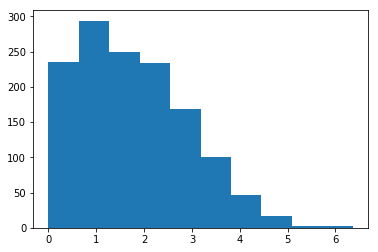

In [70]:
df["datetime"] = pd.to_datetime(df.release_time)
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["hour"] = df["datetime"].dt.hour
df["day"] = df["datetime"].dt.day
df["dayofyear"] = df["datetime"].dt.dayofyear
df["weekday"] = df["datetime"].dt.weekday

df["hourandday_release"] = df.groupby(["year","dayofyear", "hour"]).ngroup().astype("category").cat.codes
a = df.groupby(["hourandday_release"]).agg({"label": ["mean", "std", "count"]})
a[("label", "std")] = a[("label", "std")].fillna(-2)
b = a[a["label", "std"] !=-2]
print("Mean std:", np.mean(b["label", "std"]))
import matplotlib.pyplot as plt
plt.hist(b["label", "std"])

In [77]:
import re
def get_min_artist_id(s):
    ps = re.split(',|\.',s)
    ps = [int(p) for p in ps]
    return np.min(ps)

def get_max_artist_id(s):
    ps = re.split(',|\.',s)
    ps = [int(p) for p in ps]
    return np.max(ps)

df["artist_id_min"]=  df["artist_id"].apply(lambda x: get_min_artist_id(x))
df["artist_id_min_cat"] = df["artist_id_min"].astype('category')
df["artist_id_min_cat"] =  df["artist_id_min_cat"].cat.codes

df["isSingleSong"] = df.groupby("album_right")["ID"].transform("count")
df1 = df[df.isSingleSong <=1]
df1.groupby("artist_id").agg({"label": ["mean","std", "count"]})

label                
                                         mean       std count
artist_id                                                    
100158                              10.000000  0.000000     4
101893                               2.000000       NaN     1
10210                                5.333333  0.577350     3
102217.832                           1.000000       NaN     1
1024.899                             3.000000       NaN     1
10343                                5.500000  3.535534     2
10343.613247                         8.000000       NaN     1
103597.432565                        2.000000       NaN     1
103597.604844                        1.000000       NaN     1
103679                               8.000000       NaN     1
104338                               9.000000       NaN     1
104447                               5.000000       NaN     1
10482                                2.000000       NaN     1
105117                               3.750000  2.872281     4
105124                               6.000000       NaN     1
105141                               4.666667  3.785939     3
105141.60478                         7.000000       NaN     1
105178                               1.500000  1.000000     4
105258                               3.000000       NaN     1
105317                               6.000000  4.242641     2
105478                               2.333333  1.154701     3
105478.2782                          1.000000       NaN     1
105515                               9.000000       NaN     1
105608                               1.000000       NaN     1
105616                               1.666667  1.632993     6
105616.603218                        1.000000  0.000000     2
105630                               1.000000  0.000000     3
105630.607523                             NaN       NaN     0
105630.73205                         1.000000       NaN     1
105725                               8.000000  2.828427     2
106082                               8.000000       NaN     1
106088                               4.000000       NaN     1
106208.602503                        2.000000       NaN     1
106369                               4.000000       NaN     1
106575                               8.000000       NaN     1
106575.604017                        2.000000       NaN     1
106634                               1.000000       NaN     1
106691                               2.428571  1.618347     7
106691.432565                        1.000000       NaN     1
106783,45634,76609                   1.000000       NaN     1
107190                                    NaN       NaN     0
107190.54452                         2.000000       NaN     1
107520                               1.000000       NaN     1
107520.30022                         1.000000       NaN     1
107590                              10.000000       NaN     1
107599                               5.000000       NaN     1
107763                               4.500000  0.707107     2
10791                                5.000000       NaN     1
107950                               4.666667  2.081666     3
108478                               7.000000  5.196152     3
108478,16409,600758                  1.000000       NaN     1
108478.48016                         1.000000       NaN     1
108811                               1.000000       NaN     1
1089                                 1.000000       NaN     1
1089.1387                            1.000000       NaN     1
108925                               4.000000  0.000000     2
108943                               5.000000       NaN     1
108967                               2.600000  1.673320     5
109037                               4.000000  0.000000     3
109037.57697                              NaN       NaN     0
109107                               2.000000       NaN     1
1111                                 1.000000  0.000000     2
11172     

/home/vuthede/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


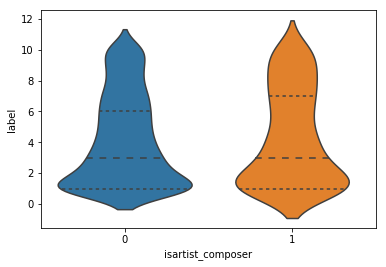

In [68]:
df1["isartist_composer"]= [1 if r.artist_id==r.composers_id  else 0 for i,r in df1.iterrows() ]
import seaborn as sns

sns.violinplot(x="isartist_composer", y="label", data=df1[df1.dataset=="train"], inner="quartile")

/home/vuthede/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/vuthede/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


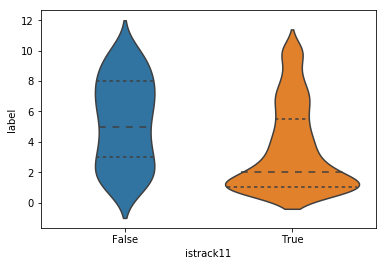

In [10]:
df1["istrack11"] = df["track"] == "(1, 1)"
import seaborn as sns
sns.violinplot(x="istrack11", y="label", data=df1[df.dataset=="train"], inner="quartile")

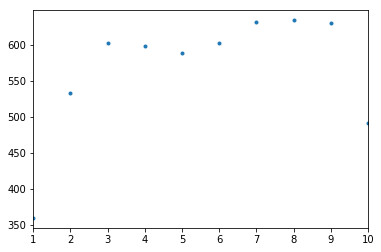

In [5]:
df2 = df[df.num_song_in_album>1]
df2.label.value_counts().plot(style=".")


Mean std: 1.5275252316519465


(array([291., 361., 211., 127.,  38.,  86.,  50.,  20.,  12.,   4.]),
 array([0.        , 0.56568542, 1.13137085, 1.69705627, 2.2627417 ,
        2.82842712, 3.39411255, 3.95979797, 4.5254834 , 5.09116882,
        5.65685425]),
 <a list of 10 Patch objects>)

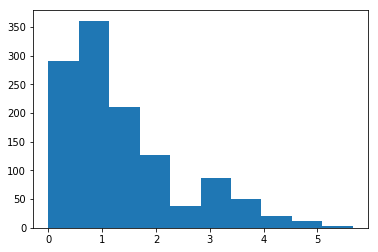

In [37]:
a = df2.groupby(["album_hash","artist_name"]).agg({"label": ["mean", "std", "count"]})
a[("label", "std")] = a[("label", "std")].fillna(-2)
b = a[a["label", "std"] !=-2]
print("Mean std:", np.percentile(b["label", "std"], 70))
import matplotlib.pyplot as plt
plt.hist(b["label", "std"])

Mean std: 1.7454482923499404


(array([242., 350., 221., 152.,  48.,  86.,  48.,  18.,  14.,   3.]),
 array([0.        , 0.56568542, 1.13137085, 1.69705627, 2.2627417 ,
        2.82842712, 3.39411255, 3.95979797, 4.5254834 , 5.09116882,
        5.65685425]),
 <a list of 10 Patch objects>)

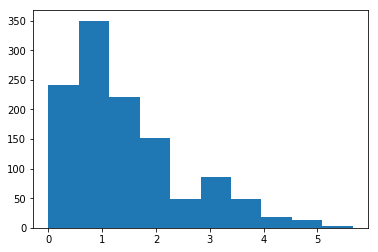

In [36]:
a = df2.groupby(["album_hash"]).agg({"label": ["mean", "std", "count"]})
a[("label", "std")] = a[("label", "std")].fillna(-2)
b = a[a["label", "std"] !=-2]
print("Mean std:", np.percentile(b["label", "std"], 70))
import matplotlib.pyplot as plt
plt.hist(b["label", "std"])

In [44]:
from math import sqrt
from sklearn.metrics import mean_squared_error

df_train = df[df.dataset=="train"]
df_train["count"]= df_train.groupby(["album_hash","artist_name"])["label"].transform("count")
print(df_train["count"].value_counts())

df_train = df_train[df_train["count"]>2]
df_train["mean_score"]= df_train.groupby(["album_hash","artist_name"])["label"].transform("mean")

print("RMSE: {:<8.5f}".format(sqrt(mean_squared_error(df_train.label, df_train.mean_score))))


1.0     2421
2.0     1362
5.0      700
3.0      687
4.0      556
6.0      450
7.0      427
8.0      408
10.0     340
9.0      270
11.0     165
12.0     144
13.0     143
19.0      95
14.0      84
73.0      73
65.0      65
53.0      53
50.0      50
16.0      48
15.0      45
43.0      43
21.0      42
17.0      34
28.0      28
27.0      27
23.0      23
18.0      18
Name: count, dtype: int64
RMSE: 1.25556 


/home/vuthede/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [46]:
from math import sqrt
from sklearn.metrics import mean_squared_error

df_train = df[df.dataset=="train"]
df_train["count"]= df_train.groupby(["artist_name"])["label"].transform("count")
print(df_train["count"].value_counts())

df_train = df_train[df_train["count"]>1]
df_train["mean_score"]= df_train.groupby(["artist_name"])["label"].transform("mean")

print("RMSE: {:<8.5f}".format(sqrt(mean_squared_error(df_train.label, df_train.mean_score))))


1      1168
2       826
3       567
6       546
4       488
5       465
8       352
10      350
7       350
9       306
11      264
12      204
20      160
13      156
14      154
17      153
19      152
147     147
18      144
120     120
23      115
16      112
56      112
111     111
100     100
98       98
46       92
15       90
21       84
41       82
27       81
26       78
25       75
73       73
71       71
69       69
31       62
59       59
28       56
53       53
50       50
48       48
22       44
38       38
36       36
34       34
30       30
29       29
24       24
Name: count, dtype: int64
RMSE: 1.66297 


/home/vuthede/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [48]:
from math import sqrt
from sklearn.metrics import mean_squared_error

df_train = df[df.dataset=="train"]
df_train["count"]= df_train.groupby(["album_hash"])["label"].transform("count")
print(df_train["count"].value_counts())

df_train = df_train[df_train["count"]>1]
df_train["mean_score"]= df_train.groupby(["album_hash"])["label"].transform("mean")

print("RMSE: {:<8.5f}".format(sqrt(mean_squared_error(df_train.label, df_train.mean_score))))


1.0     1682
2.0     1158
5.0      690
3.0      666
4.0      612
8.0      560
7.0      546
6.0      528
10.0     390
9.0      315
12.0     264
11.0     220
14.0     140
18.0     126
13.0     117
15.0     105
89.0      89
17.0      85
65.0      65
58.0      58
19.0      57
53.0      53
46.0      46
23.0      46
20.0      40
37.0      37
16.0      32
27.0      27
26.0      26
21.0      21
Name: count, dtype: int64
RMSE: 1.37127 


/home/vuthede/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


/home/vuthede/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/vuthede/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


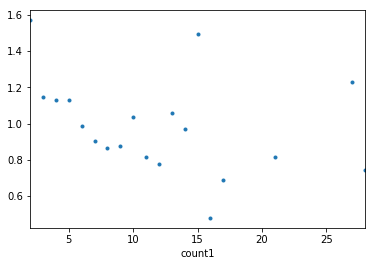

In [21]:
# df3 = b.droplevel("label")
b["std1"] = b[("label", "std")]
b["count1"] = b[("label", "count")]
b.groupby("count1")["std1"].mean().plot(style=".")

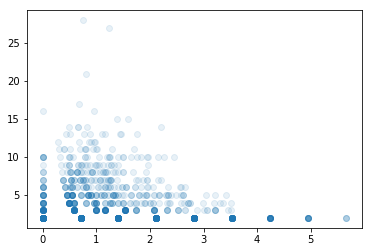

In [58]:
plt.scatter(b["label", "std"], b["label", "count"], alpha=0.1)